In [1]:
# add library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline   
import seaborn as sns
import warnings
import matplotlib as mpl
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from skrebate import ReliefF
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier


In [2]:
data_file = './data/GSE66099.csv'
degs_file = './gene_diff_data.csv'
# data pre-processing
norm_filter = MinMaxScaler()

label = 'Died'
num_features = 10

DEGs = pd.read_csv(degs_file)
degs_gene_id = DEGs["X"]

data = pd.read_csv(data_file)
degs_gene_data = data[degs_gene_id]
degs_gene_data.loc[:,"label"]  = data[label]
degs_gene_data

C:\Users\vuduc\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\vuduc\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,SLC39A8,RHAG,DDIT4,MPO,RRM2,CCL3,TGFBI,MAFF,TYMS,ENPP2,...,FEN1,AURKA,FRAT1,SNRPG,KIF2C,POLE2,UBE2C,AURKB,CENPF,label
0,7.837760,4.112866,8.046405,2.324069,4.759059,3.140721,4.143039,8.578116,5.230842,3.862937,...,4.062130,3.009849,8.785775,9.787393,2.240854,2.622261,4.787508,3.002504,2.246339,1
1,7.751983,1.485795,8.971049,5.258546,7.684430,2.811141,4.977650,4.715507,7.567845,3.212268,...,4.651380,4.084429,8.823993,9.877403,3.083158,2.470562,5.049623,2.667229,3.301098,0
2,10.279053,1.925620,8.712714,1.856427,5.890788,5.947866,4.036440,9.109963,6.066830,3.086101,...,3.554817,2.921564,8.135534,10.673182,2.399208,2.270243,4.136699,3.181530,2.663032,1
3,9.601609,5.888388,8.527441,5.750055,8.206514,5.134266,4.616064,5.156271,8.057016,2.684719,...,5.330526,4.034944,7.884369,9.025149,3.205451,2.998327,5.846744,3.883344,3.662963,1
4,7.785195,4.846312,9.301229,8.695507,10.032503,6.555199,6.542890,8.041716,9.813448,7.125344,...,6.783366,6.314857,8.603358,10.328848,4.966912,4.004817,6.864789,5.244933,4.199692,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,7.181331,2.365467,8.184828,6.181315,7.871825,2.929050,7.998090,4.431776,7.034406,3.780909,...,4.477342,4.055716,8.839066,9.910092,2.871094,3.078237,3.940554,3.216972,3.462929,0
195,5.251613,2.714796,6.427088,3.523980,7.221401,2.154800,4.979873,7.541867,7.252205,2.629904,...,5.162441,3.987030,9.600255,6.991776,2.501947,2.859321,4.154692,3.430309,3.199781,0
196,5.905524,8.074482,6.259182,2.492298,5.146876,1.794615,8.446067,8.769124,4.142922,2.246056,...,4.168839,4.630949,7.698138,9.373841,2.188718,2.145200,4.212061,2.516086,2.280285,0
197,4.786756,2.279402,5.955421,8.199064,8.008226,3.352024,9.477510,5.653967,7.454457,2.954322,...,4.676477,4.053300,8.976000,6.692781,2.799296,2.676570,4.434418,3.215429,3.070606,0


In [3]:
# split data 7/3
from sklearn.model_selection import train_test_split

# y = degs_gene_data.iloc[:,108].values
X, y = degs_gene_data.iloc[:,0:108].values, degs_gene_data.iloc[:,108].values


In [4]:
X[:,0]

array([ 7.83775973,  7.75198314, 10.27905306,  9.60160927,  7.78519525,
        5.14753555,  7.14121395, 11.38452663,  8.26078177,  6.22483544,
        6.46213086,  7.79898583,  4.20774828,  7.07662203,  3.93496862,
        6.60139579,  3.97741554,  6.49158695,  8.16663839,  9.07082746,
        5.01822753,  8.25139113,  6.27991797,  9.44387897,  8.43953965,
        6.67005359,  8.2200189 ,  9.72462787,  7.56828044,  6.6055124 ,
        7.65395323,  5.93015729,  7.287119  ,  3.26349989,  8.1171794 ,
        4.62516107,  4.11643358,  3.59600687,  8.07753005,  6.01667048,
        7.04779533,  8.38746683,  7.79722778,  5.72060779,  6.28258969,
        7.2374142 ,  6.49645489,  3.61215667,  5.97706047,  3.84253424,
        9.66056183,  3.00023329,  4.58147715,  8.71223199,  7.74541413,
        5.02613673,  6.83645476,  5.73876807,  5.89086525,  6.73654376,
        4.76253428,  9.6712716 ,  4.0463812 ,  7.44242834,  7.45057279,
        7.41139449,  6.0985281 ,  5.41118317,  6.05895461,  6.65

In [5]:
# normalize data:
def nml(gene_data):
    normalize_data = (gene_data - min(gene_data))/(max(gene_data) - min(gene_data))
    return normalize_data
for i in range(108):
    X[:,i] = nml(X[:,i])

In [6]:
X[:,0].shape

(199,)

In [7]:
y

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1234,
                                                   shuffle=True, stratify=y)

<BarContainer object of 139 artists>

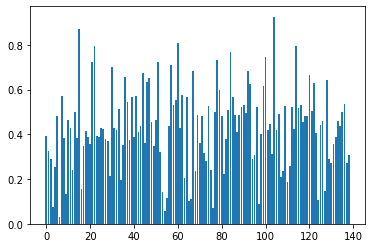

In [9]:
plt.bar(list(range(139)),X_train[0:139,0])

In [10]:
from sklearn import metrics

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

print('Training accuracy:', np.mean(rf.predict(X_train) == y_train)*100)
print('Test accuracy:', np.mean(rf.predict(X_test) == y_test)*100)

Training accuracy: 100.0
Test accuracy: 91.66666666666666


In [240]:
def evaluate(y_pred, y_test):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(len(y_test)):
        if (y_pred[i]==1 and y_test[i]==1):
            tp = tp + 1
        elif (y_pred[i]==0 and y_test[i]==0):
            tn = tn + 1
        elif (y_pred[i]==1 and y_test[i]==0):
            fp = fp + 1
        else:
            fn = fn + 1
    sn = tp/(tp+fn)
    sp = tn/(tn+fp)
    fpr = fp/(tn+fp)
    acc = (tp+tn)/(tp+fp+tn+fn)
    M = {
        "sn":sn,
        "sp":sp,
        "acc":acc,
        "tp":tp,
        "tn":tn,
        "fp":fp,
        "fn":fn,
        "fpr":fpr
    }
    return M   
      
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = rf.predict(X_test)
metric = evaluate(y_pred, y_test)


In [12]:
metric

{'sn': 0.375,
 'sp': 1.0,
 'acc': 0.9166666666666666,
 'tp': 3,
 'tn': 52,
 'fp': 0,
 'fn': 5}

In [13]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [14]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

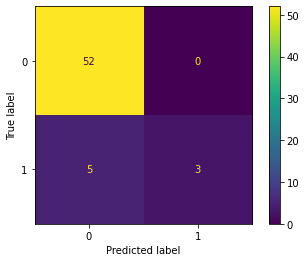

In [15]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

# Genetic Algorithms

In [120]:
# genetic algorithm search of the one max optimization problem
from numpy.random import randint
from numpy.random import rand
 
# objective function
def onemax(x):
    return -sum(x)

In [127]:
onemax

<function __main__.onemax(x)>

In [121]:
def selection(pop, scores, k=3):
    # first random selection
    selection_ix = randint(len(pop))
    for ix in randint(0, len(pop), k-1):
        # check if better (e.g. perform a tournament)
        if scores[ix] < scores[selection_ix]:
            selection_ix = ix
    return pop[selection_ix]

In [122]:
# crossover two parents to create two children
def crossover(p1, p2, r_cross):
    # children are copies of parents by default
    c1, c2 = p1.copy(), p2.copy()
    # check for recombination
    if rand() < r_cross:
        # select crossover point that is not on the end of the string
        pt = randint(1, len(p1)-2)
        # perform crossover
        c1 = p1[:pt] + p2[pt:]
        c2 = p2[:pt] + p1[pt:]
    return [c1, c2]

# mutation operator
def mutation(bitstring, r_mut):
    for i in range(len(bitstring)):
        # check for a mutation
        if rand() < r_mut:
            # flip the bit
            bitstring[i] = 1 - bitstring[i]

In [123]:
# genetic algorithm
def genetic_algorithm(objective, n_bits, n_iter, n_pop, r_cross, r_mut):
# initial population of random bitstring
    pop = [randint(0, 2, n_bits).tolist() for _ in range(n_pop)]
    # keep track of best solution
    best, best_eval = 0, objective(pop[0])
    # enumerate generations
    for gen in range(n_iter):
        # evaluate all candidates in the population
        scores = [objective(c) for c in pop]
        # check for new best solution
        for i in range(n_pop):
            if scores[i] < best_eval:
                best, best_eval = pop[i], scores[i]
                print(">%d, new best f(%s) = %.3f" % (gen,  pop[i], scores[i]))
        # select parents
        selected = [selection(pop, scores) for _ in range(n_pop)]
        # create the next generation
        children = list()
        for i in range(0, n_pop, 2):
            # get selected parents in pairs
            p1, p2 = selected[i], selected[i+1]
            # crossover and mutation
            for c in crossover(p1, p2, r_cross):
                # mutation
                mutation(c, r_mut)
                # store for next generation
                children.append(c)
        # replace population
        pop = children
    return [best, best_eval]

In [124]:
# define the total iterations
n_iter = 100
# bits
n_bits = 20
# define the population size
n_pop = 100
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / float(n_bits)
# perform the genetic algorithm search
best, score = genetic_algorithm(onemax, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')
print('f(%s) = %f' % (best, score))

>0, new best f([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1]) = -15.000
>1, new best f([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]) = -16.000
>2, new best f([0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) = -17.000
>3, new best f([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) = -19.000
>6, new best f([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) = -20.000
Done!
f([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) = -20.000000


## genetic algorithms by sklearn

In [131]:
import random
import numpy as np
from sklearn import datasets, linear_model
from genetic_selection import GeneticSelectionCV

#     random.seed(42)
#     np.random.seed(42)

#     iris = datasets.load_iris()

    # Some noisy data not correlated
#     E = np.random.uniform(0, 0.1, size=(len(iris.data), 20))

#     X = np.hstack((iris.data, E))
#     y = iris.target
#     estimator = linear_model.LogisticRegression(solver="liblinear", multi_class="ovr")
def genetic():
    X = X_train
    y = y_train
    estimator = LogisticRegression(penalty="l2", random_state=0)
    
    selector = GeneticSelectionCV(
        estimator,
        cv=5,
        verbose=1,
        scoring="accuracy",
        max_features=30,
        n_population=50,
        crossover_proba=0.5,
        mutation_proba=0.1,
        n_generations=50,
        crossover_independent_proba=0.5,
        mutation_independent_proba=0.05,
        tournament_size=3,
        n_gen_no_change=10,
        caching=True,
        n_jobs=-1,
    )
    selector = selector.fit(X, y)
    arr = selector.support_
    return arr

# loop 100 interation get feature
total = []
for i in range(100):
    a = genetic()
    total.append(a*1)

Selecting features with genetic algorithm.
gen	nevals	avg                               	std                            	min                            	max                               
0  	50    	[  0.864635  14.8        0.014014]	[ 0.009908  8.56738   0.010568]	[ 0.848942  1.        0.002116]	[  0.891799  30.         0.036672]
1  	30    	[-199.146757   16.94      200.018065]	[ 1400.121892     7.178886  1399.997419]	[-10000.            1.            0.002116]	[     0.891799     33.        10000.      ]
2  	29    	[-399.15846    20.6       400.021713]	[ 1959.763573     6.403124  1959.587362]	[-10000.            7.            0.002116]	[     0.891799     32.        10000.      ]
3  	30    	[-799.189413   23.52      800.02372 ]	[ 2713.171022     5.00096   2712.924999]	[-10000.           10.            0.014956]	[     0.891799     31.        10000.      ]
4  	38    	[-199.133778   23.32      200.026747]	[ 1400.123746     3.98216   1399.996179]	[-10000.           15.            0.016402]

19 	21    	[  0.898513  15.64       0.036138]   	[ 0.001696  1.276871  0.000749]         	[  0.891799  15.         0.033173]         	[  0.898942  22.         0.036327]         
20 	25    	[  0.898228  15.32       0.035928]   	[ 0.002945  1.047664  0.001694]         	[  0.884656  15.         0.027915]         	[  0.898942  20.         0.036327]         
21 	24    	[  0.896656  15.74       0.034965]   	[ 0.005792  1.841847  0.003836]         	[  0.877513  15.         0.018867]         	[  0.898942  22.         0.036327]         
22 	24    	[  0.898228  15.26       0.035928]   	[ 0.002945  1.073499  0.001694]         	[  0.884656  15.         0.027915]         	[  0.898942  21.         0.036327]         
23 	22    	[  0.897942  15.5        0.035684]   	[ 0.003782  1.53948   0.002738]         	[  0.877513  15.         0.018867]         	[  0.898942  22.         0.036327]         
24 	28    	[  0.897656  15.66       0.035633]   	[ 0.003695  2.150442  0.002088]         	[  0.884656  15.    

5  	26    	[  0.884942  17.64       0.01943 ]   	[ 0.005883  2.861887  0.003815]         	[  0.863228  15.         0.014956]         	[  0.891799  26.         0.027915]         
6  	22    	[  0.885228  18.54       0.020789]   	[ 0.007933  3.169921  0.004201]         	[  0.863228  15.         0.014956]         	[  0.891799  26.         0.029431]         
7  	25    	[  0.888085  19.46       0.02213 ]   	[ 0.006101  2.736494  0.00332 ]         	[  0.87037   15.         0.016402]         	[  0.898942  26.         0.028451]         
8  	20    	[  0.890937  20.72       0.024864]   	[ 0.006348  3.05313   0.003628]         	[  0.870106  16.         0.016402]         	[  0.898942  27.         0.036327]         
9  	25    	[  0.892942  22.48       0.026449]   	[ 0.004598  2.66263   0.003683]         	[  0.877513  17.         0.016402]         	[  0.898942  28.         0.036327]         
10 	23    	[  0.895074  22.8        0.028442]   	[ 0.005598  2.181742  0.004609]         	[  0.877249  17.    

21 	17    	[  0.89137   13.56       0.024513]	[ 0.001696  1.698941  0.00086 ]	[  0.884656  13.         0.024295]	[  0.891799  21.         0.027915]
22 	27    	[  0.890656  13.42       0.024875]	[ 0.002619  1.563202  0.001327]	[  0.884656  12.         0.024295]	[  0.891799  20.         0.027915]
23 	23    	[  0.891513  13.28       0.024554]	[ 0.002458  1.21721   0.001033]	[  0.877513  13.         0.024295]	[  0.898942  20.         0.029431]
24 	21    	[  0.891799  13.42       0.024353]	[ 0.002474  1.5374    0.00113 ]	[  0.877513  13.         0.018867]	[  0.898942  20.         0.028451]
25 	22    	[  0.891799  13.94       0.025117]	[ 0.002474  2.203724  0.002074]	[  0.884656  12.         0.024295]	[  0.898942  22.         0.033173]
26 	23    	[  0.892228  15.3        0.025581]	[ 0.004143  3.207803  0.002489]	[  0.884656  12.         0.016402]	[  0.898942  23.         0.033173]
27 	27    	[  0.894228  16.92       0.026318]	[ 0.005073  3.543106  0.002985]	[  0.877513  13.         0.016402]

30 	20    	[  0.905905  19.14       0.018975]      	[ 0.001759  0.693109  0.00319 ]         	[  0.898942  19.         0.018202]         	[  0.906349  23.         0.036327]         
31 	37    	[  0.90518   19.34       0.019392]      	[ 0.003668  0.992169  0.003228]         	[  0.884656  19.         0.018202]         	[  0.906349  24.         0.028451]         
32 	23    	[  0.906048  19.32       0.018857]      	[ 0.001451  1.173712  0.002602]         	[  0.898942  19.         0.018202]         	[  0.906349  25.         0.030441]         
Selecting features with genetic algorithm.
gen	nevals	avg                               	std                            	min                            	max                               
0  	50    	[  0.863762  14.92       0.013943]	[ 0.010001  9.299118  0.009444]	[ 0.848677  1.        0.002116]	[  0.884656  30.         0.031217]
1  	30    	[-199.145751   19.96      200.018519]	[ 1400.122036     7.222077  1399.997354]	[-10000.            1.            

13 	32    	[  0.897794  20.74       0.036097]   	[ 0.003006  1.957652  0.001495]         	[  0.884392  18.         0.033173]         	[  0.898942  27.         0.043724]         
14 	28    	[  0.897942  20.02       0.035844]   	[ 0.002861  2.034601  0.001475]         	[  0.884656  18.         0.027915]         	[  0.898942  28.         0.036327]         
15 	27    	[  0.898942  19.04       0.036456]   	[ 0.        1.413648  0.000903]         	[  0.898942  18.         0.036327]         	[  0.898942  25.         0.042777]         
16 	32    	[  0.898656  18.44       0.036159]   	[ 0.002     0.941488  0.001178]         	[  0.884656  17.         0.027915]         	[  0.898942  22.         0.036327]         
17 	31    	[  0.898222  18.82       0.036294]   	[ 0.002159  2.046363  0.001789]         	[  0.891534  17.         0.033173]         	[  0.898942  26.         0.047295]         
18 	36    	[  0.898508  18.62       0.036269]   	[ 0.002695  1.66      0.003204]         	[  0.884392  17.    

17 	29    	[  0.897513  17.48       0.027872]   	[ 0.004738  1.330263  0.002262]         	[  0.877513  17.         0.016402]         	[  0.898942  23.         0.029431]         
18 	25    	[  0.896656  17.54       0.027956]   	[ 0.005966  1.388668  0.002178]         	[  0.87037   17.         0.018462]         	[  0.898942  23.         0.033173]         
19 	25    	[  0.898942  17.28       0.028451]   	[ 0.        1.371714  0.      ]         	[  0.898942  17.         0.028451]         	[  0.898942  24.         0.028451]         
20 	29    	[  0.898085  17.44       0.028068]   	[ 0.004199  1.512085  0.001878]         	[  0.877513  17.         0.018867]         	[  0.898942  26.         0.028451]         
21 	17    	[  0.89837   17.18       0.028176]   	[ 0.003143  0.887468  0.001452]         	[  0.877513  17.         0.018867]         	[  0.898942  22.         0.028451]         
22 	28    	[  0.898513  17.38       0.028379]   	[ 0.001696  1.309809  0.001064]         	[  0.891799  17.    

4  	25    	[  0.889503  25.76       0.025253]   	[ 0.004163  2.588899  0.004644]         	[  0.877513  17.         0.016402]         	[  0.891799  29.         0.043724]         
5  	20    	[-199.127185   26.08      200.025108]	[ 1400.124688     2.180275  1399.996413]	[-10000.           17.            0.016402]	[     0.891799     31.        10000.      ]
6  	29    	[  0.890794  25.88       0.025483]   	[ 0.005742  1.680952  0.005022]         	[  0.87037   22.         0.016402]         	[  0.906349  30.         0.043724]         
7  	26    	[  0.891815  25.48       0.025193]   	[ 0.008625  1.899895  0.004579]         	[  0.856085  22.         0.016402]         	[  0.906349  30.         0.041552]         
8  	27    	[  0.893101  25.36       0.025297]   	[ 0.007139  1.852134  0.004905]         	[  0.877513  22.         0.016402]         	[  0.906349  30.         0.041552]         
9  	31    	[-399.141841   25.46      400.025166]	[ 1959.766965     2.765574  1959.586657]	[-10000.           1

12 	22    	[  0.897656  19.64       0.027859]   	[ 0.003094  2.613503  0.00144 ]         	[  0.884656  15.         0.024295]         	[  0.898942  28.         0.028451]         
13 	24    	[  0.898085  18.38       0.028188]   	[ 0.003393  1.864296  0.001704]         	[  0.877513  13.         0.018867]         	[  0.898942  25.         0.033173]         
14 	21    	[  0.898799  17.82       0.028655]   	[ 0.001     1.291356  0.0021  ]         	[  0.891799  15.         0.024295]         	[  0.898942  21.         0.042777]         
15 	30    	[  0.898513  17.1        0.028517]   	[ 0.002218  1.9       0.001206]         	[  0.884656  14.         0.024295]         	[  0.898942  24.         0.035909]         
16 	24    	[  0.897799  16.52       0.028021]   	[ 0.003603  2.109407  0.001866]         	[  0.877513  15.         0.018867]         	[  0.898942  26.         0.033173]         
17 	34    	[  0.897794  15.78       0.028775]   	[ 0.003612  1.418309  0.001947]         	[  0.884656  14.    

25 	31    	[  0.905228  22.28       0.036877]   	[ 0.002726  1.096175  0.00313 ]         	[  0.891799  21.         0.024295]         	[  0.906085  28.         0.037906]         
26 	22    	[  0.90437   22.36       0.036467]   	[ 0.005451  1.261111  0.004205]         	[  0.877513  21.         0.016402]         	[  0.906085  28.         0.037906]         
27 	18    	[  0.90537   22.12       0.037383]   	[ 0.002575  0.992774  0.002278]         	[  0.891799  20.         0.028451]         	[  0.906085  28.         0.040133]         
28 	19    	[  0.905085  22.34       0.037213]   	[ 0.003782  1.38      0.002657]         	[  0.884656  21.         0.024295]         	[  0.906085  30.         0.037906]         
29 	28    	[  0.905656  22.16       0.037338]   	[ 0.001696  1.27059   0.002245]         	[  0.898942  21.         0.028451]         	[  0.906085  29.         0.037906]         
30 	23    	[  0.904799  21.86       0.036888]   	[ 0.004211  0.824864  0.003769]         	[  0.884656  21.    

2  	20    	[-199.140037   19.12      200.023122]	[ 1400.122852     7.312018  1399.996697]	[-10000.            7.            0.002116]	[     0.891799     31.        10000.      ]
3  	26    	[  0.882656  21.5        0.026811]   	[ 0.007004  6.344289  0.005055]         	[ 0.863228  8.        0.014956]            	[  0.891799  30.         0.040133]         
4  	22    	[-399.149026   22.78      400.027644]	[ 1959.765498     4.809532  1959.586151]	[-10000.           13.            0.016402]	[     0.898942     32.        10000.      ]
5  	34    	[-399.14873    23.4       400.027512]	[ 1959.765559     4.409082  1959.586178]	[-10000.           13.            0.014956]	[     0.898942     34.        10000.      ]
6  	27    	[-399.146016   23.38      400.029541]	[ 1959.766113     4.93919   1959.585764]	[-10000.           13.            0.018462]	[     0.898942     35.        10000.      ]
7  	24    	[-199.126751   22.22      200.029971]	[ 1400.12475      3.732506  1399.995718]	[-10000.           1

13 	23    	[  0.905339  22.42       0.024855]   	[ 0.005129  1.575944  0.005854]         	[  0.877513  20.         0.018202]         	[  0.913492  26.         0.030441]         
14 	27    	[  0.906862  22.24       0.020803]   	[ 0.005946  1.795104  0.005504]         	[  0.891534  20.         0.014763]         	[  0.913492  29.         0.041552]         
15 	32    	[  0.909037  21.74       0.019543]   	[ 0.006424  1.338805  0.003839]         	[  0.884656  20.         0.014763]         	[  0.913492  27.         0.035909]         
16 	25    	[  0.91191   21.66       0.018901]   	[ 0.00462   1.142103  0.002115]         	[  0.884656  20.         0.018202]         	[  0.913492  26.         0.030441]         
17 	27    	[  0.912767  21.34       0.018936]   	[ 0.002617  1.350704  0.002155]         	[  0.898942  19.         0.018202]         	[  0.913492  26.         0.030441]         
18 	25    	[  0.912037  20.68       0.019709]   	[ 0.003266  1.223765  0.004502]         	[  0.898677  18.    

10 	24    	[  0.904656  21.62       0.030068]   	[ 0.004041  2.261769  0.001068]         	[  0.884656  18.         0.024295]         	[  0.906085  29.         0.030441]         
11 	21    	[  0.905085  20.24       0.030119]   	[ 0.002861  2.083843  0.001023]         	[  0.891799  17.         0.024295]         	[  0.906085  27.         0.030441]         
12 	29    	[  0.904799  18.7        0.030108]   	[ 0.003962  1.486607  0.001043]         	[  0.884656  16.         0.024295]         	[  0.906085  22.         0.030441]         
13 	26    	[  0.905222  17.92       0.030504]   	[ 0.002752  1.467515  0.001668]         	[  0.891534  15.         0.028451]         	[  0.906085  24.         0.041552]         
14 	22    	[  0.904942  17.46       0.030184]   	[ 0.004598  1.675828  0.001709]         	[  0.877513  14.         0.018867]         	[  0.906085  24.         0.033173]         
15 	26    	[  0.905085  16.58       0.030075]   	[ 0.003198  1.470918  0.001271]         	[  0.891799  14.    

17 	32    	[  0.903656  16.58       0.030951]   	[ 0.004868  2.554134  0.002906]         	[  0.884656  13.         0.016402]         	[  0.906085  27.         0.036327]         
18 	22    	[  0.904942  15.86       0.030686]   	[ 0.003307  1.720581  0.001733]         	[  0.891799  14.         0.024295]         	[  0.906085  21.         0.036327]         
19 	22    	[  0.905228  15.1        0.03045 ]   	[ 0.003077  1.652271  0.001295]         	[  0.891799  13.         0.024295]         	[  0.906085  25.         0.036327]         
20 	32    	[  0.904656  14.94       0.030425]   	[ 0.00378   2.014051  0.001409]         	[  0.891799  13.         0.024295]         	[  0.906085  24.         0.036327]         
21 	25    	[  0.904085  14.46       0.031004]   	[ 0.004747  1.41718   0.001402]         	[  0.891799  13.         0.030441]         	[  0.906085  21.         0.036327]         
22 	27    	[  0.903228  14.28       0.030386]   	[ 0.007693  1.020588  0.001175]         	[  0.87037   13.    

8  	36    	[  0.889942  18.74       0.031573]   	[ 0.00424   3.09716   0.003457]         	[  0.877513  12.         0.018867]         	[  0.898942  27.         0.036327]         
9  	28    	[  0.891228  17.7        0.031947]   	[ 0.005119  3.214032  0.003359]         	[  0.877513  12.         0.018867]         	[  0.898942  24.         0.036327]         
10 	21    	[  0.893085  18.72       0.031773]   	[ 0.005089  3.857668  0.003158]         	[ 0.877513  9.        0.018867]            	[  0.898942  27.         0.036327]         
11 	30    	[  0.893656  18.66       0.031962]   	[ 0.003992  2.825668  0.002712]         	[  0.884656  13.         0.024295]         	[  0.898942  23.         0.036327]         
12 	28    	[  0.89437   18.64       0.031984]   	[ 0.004228  3.345206  0.002723]         	[  0.884656  13.         0.028451]         	[  0.898942  28.         0.036327]         
13 	25    	[-199.122757   20.72      200.03008 ]	[ 1400.12532      3.682608  1399.995703]	[-10000.           1

2  	24    	[  0.882794  21.86       0.024967]   	[ 0.006975  4.15697   0.005443]         	[  0.863228  11.         0.014956]         	[  0.898942  29.         0.038532]         
3  	34    	[  0.886656  22.18       0.0265  ]   	[ 0.007959  3.491074  0.004695]         	[  0.856085  15.         0.002116]         	[  0.898942  30.         0.033173]         
4  	25    	[-199.125894   22.54      200.027374]	[ 1400.124872     3.505481  1399.996089]	[-10000.           16.            0.018202]	[     0.906349     34.        10000.      ]
5  	24    	[  0.896101  22.84       0.027606]   	[ 0.005569  3.170867  0.005435]         	[  0.877513  18.         0.014763]         	[  0.906349  29.         0.044154]         
6  	38    	[  0.898561  21.08       0.02664 ]   	[ 0.004213  2.180275  0.005228]         	[  0.891534  18.         0.014763]         	[  0.906349  27.         0.041552]         
7  	29    	[  0.901497  19.76       0.023179]   	[ 0.004046  1.32      0.005726]         	[  0.891799  18.    

28 	21    	[  0.898772  20.62       0.015183]   	[ 0.002251  1.198165  0.002127]         	[  0.884656  20.         0.014763]         	[  0.899206  27.         0.027915]         
29 	26    	[  0.898915  20.2        0.015111]   	[ 0.001426  0.632456  0.001714]         	[  0.891799  20.         0.014763]         	[  0.899206  23.         0.024295]         
30 	29    	[  0.899058  20.32       0.014953]   	[ 0.001037  1.287478  0.001335]         	[  0.891799  19.         0.014763]         	[  0.899206  26.         0.024295]         
31 	26    	[  0.898619  20.28       0.015719]   	[ 0.002451  1.166876  0.002694]         	[  0.891799  19.         0.014763]         	[  0.906349  25.         0.024295]         
32 	22    	[  0.899487  19.86       0.01516 ]   	[ 0.00202   0.872009  0.001539]         	[  0.891799  19.         0.014763]         	[  0.906349  23.         0.024295]         
33 	26    	[  0.898767  19.92       0.016165]   	[ 0.004633  1.246435  0.003164]         	[  0.884656  18.    

23 	28    	[  0.898799  16.58       0.028546]   	[ 0.001     0.568859  0.000661]         	[  0.891799  15.         0.028451]         	[  0.898942  18.         0.033173]         
24 	34    	[  0.898085  16.94       0.028663]   	[ 0.002321  2.014051  0.001559]         	[  0.891799  15.         0.024295]         	[  0.898942  23.         0.033173]         
25 	30    	[  0.898228  16.24       0.02846 ]   	[ 0.003571  1.225724  0.000158]         	[  0.877513  15.         0.027915]         	[  0.898942  22.         0.029431]         
26 	24    	[  0.898228  16.02       0.028724]   	[ 0.002575  1.37826   0.001127]         	[  0.884656  15.         0.027915]         	[  0.898942  21.         0.033173]         
27 	20    	[  0.898942  15.26       0.028451]   	[ 0.        0.438634  0.      ]         	[  0.898942  15.         0.028451]         	[  0.898942  16.         0.028451]         
28 	27    	[  0.898799  15.3        0.028546]   	[ 0.001     1.063015  0.000661]         	[  0.891799  15.    

gen	nevals	avg                               	std                            	min                            	max                               
0  	50    	[  0.866937  15.94       0.014849]	[ 0.009817  8.053347  0.009196]	[ 0.848942  1.        0.002116]	[  0.884656  30.         0.038286]
1  	26    	[  0.873794  20.18       0.021132]	[ 0.007992  5.221839  0.006812]	[ 0.856085  7.        0.002116]	[  0.884656  30.         0.036672]
2  	21    	[-199.140201   21.12      200.024257]	[ 1400.122828     4.680342  1399.996535]	[-10000.            9.            0.014956]	[     0.884656     33.        10000.      ]
3  	25    	[  0.881069  20.32       0.025746]   	[ 0.00707   3.289012  0.005214]         	[  0.848677  10.         0.014956]         	[  0.891799  30.         0.038532]         
4  	31    	[  0.882788  20.84       0.026801]   	[ 0.008217  3.443022  0.004481]         	[  0.85582   15.         0.014956]         	[  0.898942  29.         0.033495]         
5  	36    	[-399.149307   23.3 

19 	28    	[  0.897942  19.6        0.027927]   	[ 0.003502  1.077033  0.001716]         	[  0.877513  19.         0.018867]         	[  0.898942  24.         0.028451]         
20 	31    	[  0.897656  19.44       0.028151]   	[ 0.004671  1.512085  0.002009]         	[  0.877513  19.         0.018867]         	[  0.898942  28.         0.033173]         
21 	35    	[  0.898656  19.3        0.028285]   	[ 0.0014    1.153256  0.000814]         	[  0.891799  18.         0.024295]         	[  0.898942  24.         0.028451]         
22 	25    	[  0.897079  19.46       0.027966]   	[ 0.006219  1.663851  0.002266]         	[  0.870106  18.         0.016402]         	[  0.898942  27.         0.030913]         
23 	24    	[  0.89837  19.18      0.02843]      	[ 0.002799  1.437915  0.000105]         	[  0.884656  18.         0.027915]         	[  0.898942  27.         0.028451]         
24 	28    	[  0.898085  19.1        0.028263]   	[ 0.003077  1.403567  0.000817]         	[  0.884656  18.    

29 	33    	[  0.904799  21.82       0.030197]   	[ 0.003094  1.681547  0.001365]         	[  0.891799  21.         0.024295]         	[  0.906085  27.         0.036327]         
30 	25    	[  0.905513  21.3        0.030281]   	[ 0.001938  0.8544    0.00054 ]         	[  0.898942  21.         0.028451]         	[  0.906085  25.         0.030441]         
31 	30    	[  0.905513  21.18       0.030416]   	[ 0.002407  1.160862  0.000554]         	[  0.891799  19.         0.028451]         	[  0.906085  28.         0.033173]         
32 	23    	[  0.90537   21.22       0.030356]   	[ 0.002575  0.944246  0.001265]         	[  0.891799  20.         0.024295]         	[  0.906085  26.         0.036327]         
Selecting features with genetic algorithm.
gen	nevals	avg                               	std                            	min                            	max                               
0  	50    	[  0.863772  14.24       0.013504]	[ 0.010517  9.094086  0.009879]	[ 0.841534  1.        

2  	22    	[  0.88036   21.94       0.024038]   	[ 0.006238  3.378816  0.005214]         	[  0.870106  15.         0.018462]         	[  0.898942  30.         0.038532]         
3  	24    	[-199.134481   21.9       200.026457]	[ 1400.123646     3.318132  1399.99622 ]	[-10000.           15.            0.014956]	[     0.898942     31.        10000.      ]
4  	33    	[-199.131614   21.78      200.027357]	[ 1400.124055     3.930852  1399.996092]	[-10000.           15.            0.016402]	[     0.898942     32.        10000.      ]
5  	27    	[-199.127899   23.48      200.028332]	[ 1400.124586     4.592341  1399.995953]	[-10000.           17.            0.024295]	[     0.898942     31.        10000.      ]
6  	30    	[-399.141873   26.72      400.027478]	[ 1959.766959     4.209703  1959.586185]	[-10000.           19.            0.018867]	[     0.898942     34.        10000.      ]
7  	18    	[-799.17555    28.        800.026165]	[ 2713.17511      3.693237  2712.924278]	[-10000.           1

16 	24    	[-399.130444   27.34      400.036434]	[ 1959.769292     1.335814  1959.584357]	[-10000.           27.            0.037906]	[     0.906085     34.        10000.      ]
Selecting features with genetic algorithm.
gen	nevals	avg                               	std                            	min                            	max                               
0  	50    	[  0.867487  18.32       0.018258]	[ 0.010498  8.675114  0.010857]	[ 0.848942  1.        0.002116]	[  0.891799  30.         0.038286]
1  	25    	[-199.143635   22.2       200.02126 ]	[ 1400.122338     5.455273  1399.996963]	[-10000.           10.            0.002116]	[     0.891799     32.        10000.      ]
2  	25    	[-399.154587   21.64      400.023052]	[ 1959.764363     5.641844  1959.587089]	[-10000.           10.            0.014956]	[     0.891799     32.        10000.      ]
3  	28    	[  0.883942  20.98       0.026469]   	[ 0.006103  5.244006  0.005855]         	[  0.87037   10.         0.018462]         

19 	25    	[  0.89837   16.66       0.028119]   	[ 0.001938  1.58253   0.001127]         	[  0.891799  14.         0.024295]         	[  0.898942  22.         0.028451]         
20 	30    	[  0.897942  16.68       0.027869]   	[ 0.002478  1.933287  0.001442]         	[  0.891799  14.         0.024295]         	[  0.898942  23.         0.028451]         
21 	31    	[  0.89837   15.94       0.028176]   	[ 0.003143  1.592608  0.001452]         	[  0.877513  14.         0.018867]         	[  0.898942  22.         0.028451]         
22 	31    	[  0.898228  15.22       0.028213]   	[ 0.002143  1.900421  0.001331]         	[  0.891799  13.         0.024295]         	[  0.898942  24.         0.033173]         
23 	25    	[  0.898085  14.64       0.028263]   	[ 0.003077  1.609472  0.000817]         	[  0.884656  13.         0.024295]         	[  0.898942  22.         0.028451]         
24 	31    	[  0.897656  14.42       0.028014]   	[ 0.003408  2.40075   0.001244]         	[  0.884656  12.    

30 	30    	[  0.904656  20.3        0.030337]   	[ 0.004518  1.118034  0.001118]         	[  0.884656  19.         0.024295]         	[  0.906085  26.         0.033173]         
31 	30    	[  0.905085  20.16       0.03068 ]   	[ 0.003782  1.12      0.001267]         	[  0.884656  19.         0.027915]         	[  0.906085  24.         0.036327]         
32 	21    	[  0.904942  20.34       0.030729]   	[ 0.002983  2.196452  0.001544]         	[  0.891799  19.         0.028451]         	[  0.906085  28.         0.036327]         
33 	25    	[  0.905513  19.44       0.030573]   	[ 0.002407  1.185917  0.000951]         	[  0.891799  18.         0.028451]         	[  0.906085  25.         0.036327]         
34 	18    	[  0.904513  19.22       0.030342]   	[ 0.004113  1.221311  0.001628]         	[  0.891799  17.         0.024295]         	[  0.906085  24.         0.036327]         
35 	24    	[  0.905799  18.8        0.030518]   	[ 0.0014    0.8       0.000875]         	[  0.898942  18.    

gen	nevals	avg                               	std                            	min                            	max                               
0  	50    	[  0.866497  14.84       0.014718]	[ 0.009599  7.800923  0.00947 ]	[ 0.848942  1.        0.002116]	[  0.884656  30.         0.037437]
1  	37    	[-199.144921   20.34      200.02087 ]	[ 1400.122154     5.194651  1399.997019]	[-10000.            1.            0.002116]	[     0.891799     31.        10000.      ]
2  	25    	[-199.135899   22.2       200.024486]	[ 1400.123443     3.898718  1399.996502]	[-10000.           14.            0.018462]	[     0.898942     35.        10000.      ]
3  	29    	[  0.886656  22.74       0.028055]   	[ 0.006234  3.416489  0.004784]         	[  0.87037   17.         0.018462]         	[  0.898942  30.         0.036327]         
4  	27    	[-599.164423   23.48      600.027544]	[ 2375.079522     4.535372  2374.861458]	[-10000.           13.            0.016402]	[     0.898942     36.        10000.      

29 	25    	[  0.905228  20.88       0.037444]   	[ 0.003393  1.27499   0.002095]         	[  0.891799  18.         0.024295]         	[  0.906085  25.         0.037906]         
30 	24    	[  0.905085  20.42       0.037255]   	[ 0.003502  0.981631  0.002442]         	[  0.891799  18.         0.024295]         	[  0.906085  24.         0.037906]         
31 	27    	[  0.904799  20.42       0.037337]   	[ 0.003962  2.088923  0.003681]         	[  0.884656  18.         0.016402]         	[  0.906085  28.         0.042777]         
32 	30    	[  0.905228  19.44       0.037734]   	[ 0.003077  1.344024  0.002252]         	[  0.891799  17.         0.024295]         	[  0.906085  24.         0.042777]         
33 	26    	[  0.905656  18.4        0.037908]   	[ 0.002218  0.824621  0.00096 ]         	[  0.891799  17.         0.033173]         	[  0.906085  20.         0.042777]         
34 	22    	[  0.905513  17.98       0.037674]   	[ 0.003143  1.086094  0.001412]         	[  0.884656  17.    

27 	20    	[  0.904799  20.7        0.03013 ]   	[ 0.003695  1.268858  0.001342]         	[  0.891799  19.         0.024295]         	[  0.906085  26.         0.033173]         
28 	22    	[  0.90537   20.04       0.030198]   	[ 0.002575  0.93723   0.000966]         	[  0.891799  19.         0.024295]         	[  0.906085  23.         0.030441]         
29 	28    	[  0.904513  19.68       0.030291]   	[ 0.0054    1.406272  0.001925]         	[  0.877513  19.         0.018867]         	[  0.906085  27.         0.036327]         
30 	23    	[  0.904799  19.44       0.030465]   	[ 0.003695  1.185917  0.00138 ]         	[  0.891799  18.         0.024295]         	[  0.906085  24.         0.036327]         
31 	18    	[  0.905656  19.16       0.030455]   	[ 0.002218  0.703136  0.000478]         	[  0.891799  19.         0.028451]         	[  0.906085  23.         0.033173]         
32 	28    	[  0.905513  19.26       0.030195]   	[ 0.002799  1.110135  0.001204]         	[  0.891799  19.    

20 	17    	[  0.906085  21.98       0.030441]   	[ 0.        1.679166  0.      ]         	[  0.906085  21.         0.030441]         	[  0.906085  30.         0.030441]         
21 	26    	[  0.905513  21.52       0.030281]   	[ 0.001938  1.374627  0.00054 ]         	[  0.898942  21.         0.028451]         	[  0.906085  26.         0.030441]         
22 	31    	[  0.905228  21.32       0.030405]   	[ 0.003681  1.028397  0.000596]         	[  0.884656  21.         0.027915]         	[  0.906085  26.         0.033173]         
23 	24    	[  0.905228  21.4        0.030785]   	[ 0.003077  1.469694  0.001251]         	[  0.891799  19.         0.030441]         	[  0.906085  28.         0.036327]         
24 	33    	[  0.905085  21.38       0.03041 ]   	[ 0.003198  1.468196  0.001325]         	[  0.891799  19.         0.024295]         	[  0.906085  29.         0.036327]         
25 	29    	[  0.904513  21.82       0.030655]   	[ 0.004354  1.80765   0.001387]         	[  0.884656  21.    

16 	31    	[  0.897656  19.5        0.027628]   	[ 0.003094  1.081665  0.002155]         	[  0.884656  19.         0.016402]         	[  0.898942  25.         0.028451]         
17 	32    	[  0.897656  19.34       0.027991]   	[ 0.004671  1.088301  0.001681]         	[  0.87037   19.         0.018462]         	[  0.898942  24.         0.028451]         
18 	26    	[  0.897799  19.26       0.028113]   	[ 0.004371  0.86741   0.00156 ]         	[  0.877513  19.         0.018867]         	[  0.898942  23.         0.029431]         
19 	24    	[  0.897942  19.34       0.028336]   	[ 0.003502  1.210124  0.000591]         	[  0.884656  19.         0.024295]         	[  0.898942  26.         0.028451]         
20 	26    	[  0.897942  19.12       0.028158]   	[ 0.00452   0.587878  0.001504]         	[  0.87037   19.         0.018462]         	[  0.898942  22.         0.028451]         
21 	30    	[  0.898228  19.2        0.027961]   	[ 0.002575  0.72111   0.001923]         	[  0.884656  19.    

20 	36    	[  0.905085  16.64       0.030769]   	[ 0.002861  1.634136  0.00151 ]         	[  0.891799  16.         0.028451]         	[  0.906085  22.         0.036327]         
21 	24    	[  0.90537   16.42       0.030691]   	[ 0.002575  1.357792  0.001246]         	[  0.891799  16.         0.028451]         	[  0.906085  22.         0.036327]         
22 	30    	[  0.905513  16.22       0.030573]   	[ 0.002407  0.900888  0.000951]         	[  0.891799  16.         0.028451]         	[  0.906085  21.         0.036327]         
23 	36    	[  0.905656  16.3        0.030321]   	[ 0.001696  1.044031  0.000472]         	[  0.898942  16.         0.028451]         	[  0.906085  21.         0.030441]         
24 	28    	[  0.904799  16.54       0.0304  ]   	[ 0.004211  1.699529  0.001343]         	[  0.884656  16.         0.024295]         	[  0.906085  26.         0.036327]         
Selecting features with genetic algorithm.
gen	nevals	avg                               	std                  

21 	26    	[-199.11518    23.1       200.029558]	[ 1400.126403     2.86531   1399.995777]	[-10000.           16.            0.024295]	[     0.906085     31.        10000.      ]
22 	27    	[  0.902513  23.62       0.030132]   	[ 0.007857  1.809862  0.003632]         	[  0.87037   19.         0.018462]         	[  0.906085  29.         0.037906]         
23 	28    	[  0.90137   23.74       0.030501]   	[ 0.008644  1.797888  0.004356]         	[  0.87037   20.         0.018462]         	[  0.906085  29.         0.037906]         
24 	29    	[  0.901228  23.58       0.031614]   	[ 0.007483  1.709854  0.005206]         	[  0.877513  20.         0.016402]         	[  0.906085  28.         0.042777]         
25 	28    	[  0.90037   23.06       0.031727]   	[ 0.007284  2.004096  0.005128]         	[  0.877513  17.         0.016402]         	[  0.906085  30.         0.037906]         
26 	25    	[-199.11618    22.78      200.032429]	[ 1400.12626      1.803219  1399.995367]	[-10000.           1

8  	30    	[  0.897799  22.16       0.035832]   	[ 0.003876  0.643739  0.001649]         	[  0.877513  21.         0.027915]         	[  0.898942  25.         0.036327]         
9  	17    	[  0.898656  22.3        0.036201]   	[ 0.0014    1.403567  0.000618]         	[  0.891799  21.         0.033173]         	[  0.898942  29.         0.036327]         
10 	31    	[  0.897799  22.         0.035738]   	[ 0.003307  0.8       0.001811]         	[  0.884656  21.         0.027915]         	[  0.898942  26.         0.036327]         
11 	29    	[-199.119466   22.2       200.035369]	[ 1400.125791     1.854724  1399.994947]	[-10000.           21.            0.027915]	[     0.898942     31.        10000.      ]
12 	31    	[  0.898228  21.36       0.035928]   	[ 0.002945  0.889044  0.001694]         	[  0.884656  20.         0.027915]         	[  0.898942  24.         0.036327]         
13 	36    	[  0.898656  21.16       0.036201]   	[ 0.0014    1.641463  0.000618]         	[  0.891799  19.    

17 	25    	[  0.891513  13.64       0.02398 ]   	[ 0.0014    2.188698  0.001547]         	[  0.884656  12.         0.016402]         	[  0.891799  28.         0.024295]         
18 	20    	[  0.891656  13.44       0.024138]   	[ 0.001     1.756815  0.001105]         	[  0.884656  12.         0.016402]         	[  0.891799  22.         0.024295]         
19 	21    	[  0.891656  12.98       0.024368]   	[ 0.001     0.905318  0.000507]         	[  0.884656  12.         0.024295]         	[  0.891799  17.         0.027915]         
20 	21    	[  0.89137   12.84       0.024029]   	[ 0.002218  1.653602  0.001328]         	[  0.877513  12.         0.016402]         	[  0.891799  22.         0.024295]         
21 	27    	[  0.891228  12.4        0.024251]   	[ 0.003143  1.414214  0.00097 ]         	[  0.87037   12.         0.018462]         	[  0.891799  20.         0.027915]         
22 	28    	[  0.891513  12.32       0.02398 ]   	[ 0.0014    1.30292   0.001547]         	[  0.884656  12.    

26 	22    	[  0.905513  21.2        0.030573]   	[ 0.002407  0.894427  0.000951]         	[  0.891799  21.         0.028451]         	[  0.906085  27.         0.036327]         
27 	26    	[-199.112466   21.54      200.029847]	[ 1400.126791     1.856987  1399.995736]	[-10000.           21.            0.028451]	[     0.906085     32.        10000.      ]
28 	24    	[  0.905656  21.18       0.030613]   	[ 0.002218  1.26      0.000902]         	[  0.891799  21.         0.030441]         	[  0.906085  30.         0.036327]         
29 	32    	[  0.905228  21.58       0.03047 ]   	[ 0.003077  1.511158  0.000675]         	[  0.891799  21.         0.028451]         	[  0.906085  27.         0.033173]         
30 	20    	[-199.112466   21.4       200.030027]	[ 1400.126791     1.649242  1399.99571 ]	[-10000.           21.            0.028451]	[     0.906085     31.        10000.      ]
Selecting features with genetic algorithm.
gen	nevals	avg                               	std                  

21 	29    	[  0.90337   19.38       0.036406]   	[ 0.005871  2.322843  0.003719]         	[  0.884656  18.         0.024295]         	[  0.906085  30.         0.042777]         
22 	25    	[  0.903942  18.98       0.036554]   	[ 0.004792  1.923434  0.003528]         	[  0.884656  18.         0.024295]         	[  0.906085  25.         0.042777]         
23 	28    	[  0.903942  18.78       0.036774]   	[ 0.005393  2.02277   0.003254]         	[  0.884656  18.         0.024295]         	[  0.906085  27.         0.040133]         
24 	21    	[  0.905799  18.14       0.037527]   	[ 0.0014    0.566039  0.001853]         	[  0.898942  18.         0.028451]         	[  0.906085  21.         0.037906]         
25 	32    	[  0.905085  18.46       0.037342]   	[ 0.003782  1.44513   0.002765]         	[  0.884656  18.         0.024295]         	[  0.906085  24.         0.042777]         
26 	19    	[  0.905656  18.12       0.037908]   	[ 0.002218  0.620967  0.00096 ]         	[  0.891799  18.    

10 	35    	[  0.891471  23.46       0.023065]   	[ 0.00201   1.602623  0.00143 ]         	[  0.884656  20.         0.022643]         	[  0.892063  29.         0.027915]         
11 	32    	[  0.891619  22.7        0.02296 ]   	[ 0.001759  0.921954  0.001252]         	[  0.884656  20.         0.022643]         	[  0.892063  25.         0.027915]         
12 	36    	[  0.891333  22.48       0.022605]   	[ 0.00263   1.345214  0.001703]         	[  0.877513  20.         0.013974]         	[  0.892063  26.         0.027915]         
13 	28    	[  0.891476  21.7        0.02299 ]   	[ 0.002467  1.403567  0.001383]         	[  0.877513  20.         0.022643]         	[  0.892063  27.         0.029431]         
14 	24    	[  0.891624  21.02       0.022681]   	[ 0.001738  1.174564  0.001617]         	[  0.884656  20.         0.013974]         	[  0.892063  26.         0.027915]         
15 	27    	[  0.891619  20.58       0.02296 ]   	[ 0.001759  1.470918  0.001252]         	[  0.884656  19.    

4  	31    	[-399.146307   25.62      400.024174]	[ 1959.766054     3.351955  1959.58686 ]	[-10000.           18.            0.016402]	[     0.898942     36.        10000.      ]
5  	31    	[-599.161995   25.38      600.02381 ]	[ 2375.080136     2.834713  2374.862402]	[-10000.           19.            0.016402]	[     0.898942     32.        10000.      ]
6  	31    	[-199.125894   24.64      200.02587 ]	[ 1400.124872     2.861887  1399.996304]	[-10000.           14.            0.016402]	[     0.898942     31.        10000.      ]
7  	26    	[-199.123608   24.3       200.027916]	[ 1400.125199     2.609598  1399.996012]	[-10000.           20.            0.016402]	[     0.898942     33.        10000.      ]
8  	20    	[-199.123757   23.08      200.027716]	[ 1400.125178     2.998933  1399.996041]	[-10000.           15.            0.016402]	[     0.898942     31.        10000.      ]
9  	28    	[  0.896656  21.64       0.028246]   	[ 0.004616  2.574956  0.003594]         	[  0.884656  18.    

6  	25    	[-599.157577   25.22      600.026955]	[ 2375.081252     2.655485  2374.861607]	[-10000.           20.            0.016402]	[     0.906085     33.        10000.      ]
7  	31    	[-199.120481   24.8       200.029161]	[ 1400.125646     2.44949   1399.995834]	[-10000.           20.            0.024295]	[     0.906085     31.        10000.      ]
8  	26    	[-399.137021   25.48      400.029005]	[ 1959.767949     3.413151  1959.585874]	[-10000.           20.            0.024295]	[     0.906085     36.        10000.      ]
9  	33    	[-599.152862   25.42      600.031087]	[ 2375.082443     2.980537  2374.860563]	[-10000.           19.            0.024295]	[     0.906085     32.        10000.      ]
10 	32    	[-199.114037   25.24      200.034784]	[ 1400.126566     2.112439  1399.995031]	[-10000.           19.            0.028451]	[     0.906085     33.        10000.      ]
11 	33    	[-199.113466   25.24      200.03554 ]	[ 1400.126648     1.828223  1399.994923]	[-10000.           2

1  	25    	[  0.872365  19.36       0.021235]	[ 0.009486  6.253831  0.008466]	[ 0.848942  1.        0.002116]	[  0.891799  30.         0.029431]
2  	29    	[  0.878794  19.46       0.025399]	[ 0.006812  4.341474  0.005085]	[  0.863228  12.         0.014956]	[  0.891799  30.         0.033173]
3  	26    	[  0.882063  21.04       0.02621 ]	[ 0.007955  3.794522  0.005469]	[  0.85582   13.         0.014956]	[  0.891799  30.         0.043724]
4  	27    	[-199.131471   22.18      200.024779]	[ 1400.124076     4.20804   1399.99646 ]	[-10000.           14.            0.014956]	[     0.898942     32.        10000.      ]
5  	36    	[-199.127757   22.68      200.025935]	[ 1400.124606     2.873604  1399.996295]	[-10000.           15.            0.016402]	[     0.898942     33.        10000.      ]
6  	29    	[  0.893942  22.54       0.027643]   	[ 0.006268  2.174488  0.004049]         	[  0.877513  16.         0.016402]         	[  0.898942  30.         0.036327]         
7  	18    	[  0.896656  2

2  	25    	[  0.879365  20.02       0.023115]	[ 0.010877  4.549681  0.006299]	[ 0.848677  9.        0.002116]	[  0.898942  28.         0.033173]
3  	26    	[-199.129894   22.7       200.025788]	[ 1400.124301     3.612478  1399.996316]	[-10000.           12.            0.014956]	[     0.898942     31.        10000.      ]
4  	22    	[  0.892799  23.58       0.026845]   	[ 0.004043  2.298608  0.003543]         	[  0.884656  18.         0.016402]         	[  0.898942  30.         0.033173]         
5  	29    	[-199.123323   23.92      200.02575 ]	[ 1400.12524      2.629373  1399.996321]	[-10000.           20.            0.016402]	[     0.898942     32.        10000.      ]
6  	30    	[  0.896085  23.56       0.026876]   	[ 0.004738  2.146253  0.003114]         	[  0.884656  18.         0.016402]         	[  0.898942  29.         0.028451]         
7  	26    	[-199.119466   23.98      200.02781 ]	[ 1400.125791     2.37057   1399.996027]	[-10000.           20.            0.024295]	[     0.8

1  	30    	[  0.877217  22.1        0.024878]	[ 0.008224  4.708503  0.005678]	[  0.848677  13.         0.014956]	[  0.891799  30.         0.033173]
2  	29    	[-199.136751   22.52      200.025282]	[ 1400.123321     3.996198  1399.996388]	[-10000.           12.            0.014956]	[     0.891799     31.        10000.      ]
3  	28    	[-199.133757   22.54      200.025762]	[ 1400.123749     3.827323  1399.99632 ]	[-10000.           15.            0.002116]	[     0.891799     32.        10000.      ]
4  	24    	[-599.167857   23.34      600.024764]	[ 2375.078655     3.876132  2374.862161]	[-10000.           18.            0.014956]	[     0.891799     32.        10000.      ]
5  	25    	[-399.14773    23.28      400.026118]	[ 1959.765763     3.768501  1959.586463]	[-10000.           18.            0.016402]	[     0.891799     32.        10000.      ]
6  	26    	[  0.889513  22.14       0.029823]   	[ 0.00415   2.905237  0.004526]         	[  0.877513  17.         0.018867]         	[  0.8

21 	21    	[  0.904228  15.5        0.030439]   	[ 0.006029  1.846619  0.002077]         	[  0.877513  14.         0.018867]         	[  0.906085  26.         0.036327]         
22 	23    	[  0.905085  15.62       0.03041 ]   	[ 0.003198  1.672005  0.001325]         	[  0.891799  15.         0.024295]         	[  0.906085  23.         0.036327]         
23 	28    	[  0.905799  15.22       0.030318]   	[ 0.002     1.404137  0.00086 ]         	[  0.891799  15.         0.024295]         	[  0.906085  25.         0.030441]         
24 	31    	[  0.905228  15.54       0.030628]   	[ 0.003077  1.538961  0.001018]         	[  0.891799  14.         0.028451]         	[  0.906085  21.         0.036327]         
Selecting features with genetic algorithm.
gen	nevals	avg                               	std                            	min                            	max                               
0  	50    	[  0.864503  12.22       0.012752]	[ 0.009226  8.023191  0.0095  ]	[ 0.848942  1.        

23 	37    	[  0.897656  13.44       0.028449]   	[ 0.003962  1.235476  0.001878]         	[  0.877513  13.         0.018867]         	[  0.898942  18.         0.033173]         
24 	24    	[  0.898228  13.44       0.028546]   	[ 0.002575  1.525254  0.001111]         	[  0.884656  13.         0.024295]         	[  0.898942  20.         0.033173]         
Selecting features with genetic algorithm.
gen	nevals	avg                               	std                            	min                            	max                               
0  	50    	[  0.865053  14.12       0.01511 ]	[ 0.010965  7.941385  0.010055]	[ 0.841534  1.        0.002116]	[  0.891799  30.         0.038532]
1  	28    	[-399.161899   19.02      400.020556]	[ 1959.762871     6.958419  1959.587598]	[-10000.            5.            0.002116]	[     0.891799     31.        10000.      ]
2  	35    	[-199.139767   22.44      200.023405]	[ 1400.12289      4.350448  1399.996656]	[-10000.           13.            0.002116]

14 	25    	[  0.898794  16.06       0.028713]   	[ 0.001037  0.42      0.001834]         	[  0.891534  16.         0.028451]         	[  0.898942  19.         0.041552]         
15 	24    	[  0.898656  16.28       0.028285]   	[ 0.0014    1.114271  0.000814]         	[  0.891799  16.         0.024295]         	[  0.898942  21.         0.028451]         
16 	24    	[  0.898222  16.24       0.028742]   	[ 0.004139  1.011138  0.001515]         	[  0.870106  16.         0.028451]         	[  0.898942  22.         0.038286]         
17 	28    	[  0.898799  16.12       0.028546]   	[ 0.001     0.84      0.000661]         	[  0.891799  16.         0.028451]         	[  0.898942  22.         0.033173]         
Selecting features with genetic algorithm.
gen	nevals	avg                               	std                            	min                            	max                               
0  	50    	[  0.863497  13.44       0.01276 ]	[ 0.010382  8.989238  0.01136 ]	[ 0.848942  1.        

6  	26    	[-199.120767   23.06      200.028433]	[ 1400.125605     2.686336  1399.995938]	[-10000.           18.            0.024295]	[     0.898942     34.        10000.      ]
7  	28    	[  0.895778  21.92       0.029152]   	[ 0.005605  2.504716  0.004126]         	[  0.877249  17.         0.016402]         	[  0.898942  28.         0.041552]         
8  	20    	[  0.897074  20.54       0.02883 ]   	[ 0.004007  1.551902  0.003416]         	[  0.884656  18.         0.016402]         	[  0.898942  24.         0.041552]         
9  	30    	[  0.897228  19.8        0.028519]   	[ 0.003051  1.48324   0.002178]         	[  0.891799  17.         0.024295]         	[  0.898942  25.         0.033173]         
10 	34    	[  0.896942  19.46       0.028686]   	[ 0.003511  1.590094  0.002191]         	[  0.884656  17.         0.024295]         	[  0.898942  24.         0.033173]         
11 	23    	[  0.897228  18.76       0.027792]   	[ 0.00418   1.619383  0.002632]         	[  0.877513  17.    

8  	23    	[-599.161286   27.44      600.02723 ]	[ 2375.080315     2.155551  2374.861538]	[-10000.           23.            0.018867]	[     0.898942     33.        10000.      ]
9  	26    	[-599.160995   27.62      600.026529]	[ 2375.080388     2.096569  2374.861715]	[-10000.           22.            0.016402]	[     0.898942     35.        10000.      ]
10 	25    	[-199.12418    26.92      200.027413]	[ 1400.125117     1.852998  1399.996084]	[-10000.           21.            0.018462]	[     0.898942     31.        10000.      ]
11 	37    	[-799.176259   26.94      800.026125]	[ 2713.174901     2.072776  2712.924289]	[-10000.           22.            0.024295]	[     0.898942     32.        10000.      ]
12 	27    	[-199.122323   26.12      200.027099]	[ 1400.125382     2.232846  1399.996129]	[-10000.           21.            0.018867]	[     0.898942     32.        10000.      ]
13 	28    	[  0.89737   26.24       0.028272]   	[ 0.004583  1.83913   0.000834]         	[  0.877513  21.    

21 	19    	[  0.898942  23.16       0.028451]   	[ 0.        0.987117  0.      ]         	[  0.898942  23.         0.028451]         	[  0.898942  30.         0.028451]         
22 	25    	[  0.898799  23.2        0.028368]   	[ 0.001     1.        0.000582]         	[  0.891799  23.         0.024295]         	[  0.898942  29.         0.028451]         
Selecting features with genetic algorithm.
gen	nevals	avg                               	std                            	min                            	max                               
0  	50    	[  0.864931  15.48       0.013342]	[ 0.00877   9.191822  0.008454]	[ 0.848677  1.        0.002116]	[  0.884656  30.         0.029431]
1  	17    	[-199.142894   22.3       200.020409]	[ 1400.122444     7.040597  1399.997084]	[-10000.            1.            0.002116]	[     0.891799     31.        10000.      ]
2  	21    	[  0.881513  24.88       0.026517]   	[ 0.006414  3.625686  0.004951]         	[  0.863228  17.         0.014956]         

44 	26    	[  0.912513  19.38       0.030593]   	[ 0.002945  1.34      0.000439]         	[  0.898942  19.         0.028451]         	[  0.913228  25.         0.030688]         
45 	28    	[  0.912656  19.6        0.030668]   	[ 0.001938  1.939072  0.000067]         	[  0.906085  19.         0.030441]         	[  0.913228  28.         0.030688]         
Selecting features with genetic algorithm.
gen	nevals	avg                               	std                            	min                            	max                               
0  	50    	[  0.866058  16.2        0.01653 ]	[ 0.009701  8.56738   0.010457]	[ 0.848677  1.        0.002116]	[  0.884656  30.         0.038286]
1  	17    	[-199.14419    20.06      200.021413]	[ 1400.122259     7.117331  1399.996941]	[-10000.            1.            0.002116]	[     0.884656     31.        10000.      ]
2  	28    	[-199.13918    20.38      200.025472]	[ 1400.122974     6.333688  1399.996361]	[-10000.           10.            0.002116]

21 	22    	[  0.905513  17.86       0.037539]   	[ 0.002799  1.67344   0.002004]         	[  0.891799  16.         0.024295]         	[  0.906085  27.         0.037906]         
22 	28    	[  0.905942  17.18       0.037716]   	[ 0.001     0.683813  0.001324]         	[  0.898942  16.         0.028451]         	[  0.906085  20.         0.037906]         
23 	32    	[  0.904942  17.28       0.037185]   	[ 0.003603  1.811519  0.002971]         	[  0.891799  15.         0.024295]         	[  0.906085  25.         0.040133]         
24 	25    	[  0.905228  16.54       0.037709]   	[ 0.003681  1.18676   0.001697]         	[  0.884656  15.         0.027915]         	[  0.906085  22.         0.042777]         
25 	26    	[  0.905942  15.96       0.037716]   	[ 0.001     1.019019  0.001324]         	[  0.898942  15.         0.028451]         	[  0.906085  20.         0.037906]         
26 	28    	[  0.905656  15.54       0.037602]   	[ 0.002218  0.805233  0.001914]         	[  0.891799  15.    

33 	29    	[-199.112608   26.38      200.029673]   	[ 1400.12677      0.977548  1399.995761]	[-10000.           25.            0.028451]	[     0.906085     31.        10000.      ]
34 	23    	[  0.905942  26.06       0.030401]      	[ 0.001     0.42      0.000279]         	[  0.898942  25.         0.028451]         	[  0.906085  28.         0.030441]         
35 	27    	[-199.112466   26.34      200.02987 ]   	[ 1400.126791     1.159483  1399.995733]	[-10000.           26.            0.028451]	[     0.906085     31.        10000.      ]
36 	26    	[-199.112608   26.26      200.029741]   	[ 1400.12677      0.97591   1399.995751]	[-10000.           26.            0.027915]	[     0.906085     31.        10000.      ]
37 	31    	[  0.905799  26.16       0.030495]      	[ 0.002     0.783837  0.000383]         	[  0.891799  26.         0.030441]         	[  0.906085  30.         0.033173]         
38 	34    	[  0.905799  26.2        0.030318]      	[ 0.002     0.824621  0.00086 ]         	[ 

Selecting features with genetic algorithm.
gen	nevals	avg                               	std                            	min                            	max                               
0  	50    	[  0.863942  12.44       0.010434]	[ 0.009286  8.151466  0.008689]	[ 0.856085  1.        0.002116]	[  0.891799  30.         0.029431]
1  	18    	[-199.143894   19.7       200.018414]	[ 1400.122301     7.449161  1399.997369]	[-10000.            2.            0.002116]	[     0.891799     32.        10000.      ]
2  	30    	[-799.190259   24.64      800.022588]	[ 2713.170773     4.978996  2712.925332]	[-10000.           12.            0.014956]	[     0.891799     33.        10000.      ]
3  	22    	[-799.185545   26.02      800.024097]	[ 2713.172163     4.076714  2712.924888]	[-10000.           12.            0.018462]	[     0.891799     36.        10000.      ]
4  	30    	[-399.150159   24.84      400.026489]	[ 1959.765267     2.845066  1959.586387]	[-10000.           19.            0.018462]

24 	32    	[  0.905799  21.7        0.030361]   	[ 0.0014   1.7      0.00039]            	[  0.898942  19.         0.028451]         	[  0.906085  29.         0.030441]         
25 	32    	[  0.905085  21.04       0.030119]   	[ 0.002861  1.232234  0.001023]         	[  0.891799  19.         0.024295]         	[  0.906085  25.         0.030441]         
26 	29    	[  0.905799  20.62       0.030518]   	[ 0.0014    1.129425  0.000875]         	[  0.898942  19.         0.028451]         	[  0.906085  25.         0.036327]         
27 	30    	[  0.905513  20.12       0.030396]   	[ 0.002407  0.992774  0.001235]         	[  0.891799  19.         0.024295]         	[  0.906085  24.         0.036327]         
28 	33    	[  0.905942  19.94       0.030401]   	[ 0.001     1.713593  0.000279]         	[  0.898942  19.         0.028451]         	[  0.906085  28.         0.030441]         
29 	27    	[  0.905656  19.44       0.030278]   	[ 0.002218  1.06132   0.000899]         	[  0.891799  19.    

8  	27    	[  0.899656  24.52       0.032761]   	[ 0.006739  2.780216  0.005795]         	[  0.884656  16.         0.024295]         	[  0.906085  30.         0.042777]         
9  	25    	[-199.114466   25.08      200.035703]	[ 1400.126505     2.784529  1399.9949  ]	[-10000.           18.            0.028451]	[     0.906085     32.        10000.      ]
10 	25    	[  0.905228  24.34       0.037212]   	[ 0.002726  2.797213  0.002319]         	[  0.891799  18.         0.028451]         	[  0.906085  30.         0.037906]         
11 	24    	[-199.113608   22.94      200.036596]	[ 1400.126627     3.349089  1399.994772]	[-10000.           18.            0.018867]	[     0.906085     34.        10000.      ]
12 	35    	[-199.113608   21.08      200.036635]	[ 1400.126627     3.097354  1399.994766]	[-10000.           17.            0.024295]	[     0.906085     31.        10000.      ]
13 	22    	[  0.905942  19.06       0.037874]   	[ 0.001     1.80455   0.000221]         	[  0.898942  17.    

14 	30    	[-1199.211074    28.78      1200.024836]	[ 3249.906692     1.780899  3249.606191]	[-10000.           26.            0.018462]	[     0.898942     34.        10000.      ]
15 	30    	[-599.157995   27.84      600.027423]   	[ 2375.081146     1.540909  2374.861489]	[-10000.           25.            0.016402]	[     0.898942     31.        10000.      ]
16 	21    	[-1399.229058    27.58      1400.024521]	[ 3470.181369     1.950282  3469.860421]	[-10000.           24.            0.016402]	[     0.898942     33.        10000.      ]
17 	27    	[-399.138302   26.8       400.027133]   	[ 1959.767688     1.56205   1959.586256]	[-10000.           25.            0.018867]	[     0.898942     33.        10000.      ]
18 	25    	[  0.898656  26.12       0.028285]      	[ 0.0014    1.16      0.000814]         	[  0.891799  23.         0.024295]         	[  0.898942  30.         0.028451]         
19 	26    	[-199.11918    25.54      200.027799]   	[ 1400.125831     1.499467  1399.996029]	[-

Selecting features with genetic algorithm.
gen	nevals	avg                               	std                            	min                            	max                               
0  	50    	[  0.866921  17.18       0.015653]	[ 0.011562  8.286592  0.009493]	[ 0.848677  2.        0.002116]	[  0.891799  30.         0.038286]
1  	28    	[-399.159307   20.98      400.0203  ]	[ 1959.7634       6.730498  1959.587651]	[-10000.            2.            0.002116]	[     0.891799     35.        10000.      ]
2  	25    	[-199.137185   22.54      200.023088]	[ 1400.123259     4.850608  1399.996702]	[-10000.            7.            0.014956]	[     0.891799     31.        10000.      ]
3  	22    	[  0.88337   23.34       0.025896]   	[ 0.006176  3.912084  0.005696]         	[ 0.863228  7.        0.014956]            	[  0.891799  30.         0.036895]         
4  	21    	[-199.131757   23.76      200.026135]	[ 1400.124035     3.630757  1399.996266]	[-10000.           17.            0.016402]

20 	22    	[  0.899513  24.62       0.031493]      	[ 0.004703  1.508509  0.00479 ]         	[  0.891799  22.         0.024295]         	[  0.906085  30.         0.042777]         
21 	26    	[  0.899656  24.62       0.033097]      	[ 0.005579  1.586064  0.005075]         	[  0.884656  22.         0.024295]         	[  0.906085  30.         0.042777]         
22 	22    	[  0.902513  24.58       0.034963]      	[ 0.005393  0.961041  0.004127]         	[  0.884656  22.         0.027915]         	[  0.906085  28.         0.037906]         
23 	19    	[-199.113037   25.12      200.036944]   	[ 1400.126709     1.290581  1399.994722]	[-10000.           24.            0.024295]	[     0.906085     31.        10000.      ]
24 	25    	[-199.112751   24.76      200.037059]   	[ 1400.12675      1.175755  1399.994706]	[-10000.           24.            0.028451]	[     0.906085     31.        10000.      ]
25 	28    	[  0.905228  24.4        0.038169]      	[ 0.003077  0.979796  0.00163 ]         	[ 

12 	22    	[  0.898085  21.1        0.040665]   	[ 0.003681  1.734935  0.004391]         	[  0.884656  19.         0.024295]         	[  0.906085  27.         0.042777]         
13 	25    	[  0.897228  21.24       0.039899]   	[ 0.005635  1.965299  0.005499]         	[  0.877513  19.         0.018867]         	[  0.906085  27.         0.042777]         
14 	20    	[  0.898513  21.82       0.04027 ]   	[ 0.005423  2.242231  0.003933]         	[  0.877513  19.         0.027915]         	[  0.906085  27.         0.042777]         
15 	25    	[  0.900228  22.82       0.038969]   	[ 0.006339  2.574413  0.004917]         	[  0.877513  19.         0.018867]         	[  0.906085  30.         0.046053]         
16 	26    	[  0.901799  23.84       0.038727]   	[ 0.005714  2.101047  0.003095]         	[  0.884656  19.         0.027915]         	[  0.906085  28.         0.042777]         
17 	27    	[  0.90437   24.54       0.037162]   	[ 0.005063  1.486069  0.003368]         	[  0.877513  19.    

5  	24    	[  0.888085  16.42       0.02833 ]   	[ 0.006266  3.365056  0.004761]         	[  0.87037   11.         0.018462]         	[  0.898942  27.         0.033173]         
6  	21    	[  0.890228  15.52       0.029743]   	[ 0.005586  2.555308  0.004544]         	[  0.877513  10.         0.018867]         	[  0.898942  22.         0.033173]         
7  	27    	[  0.891513  15.48       0.030518]   	[ 0.00494   2.118868  0.004646]         	[  0.877513  12.         0.016402]         	[  0.898942  22.         0.035909]         
8  	27    	[  0.892656  16.6        0.029868]   	[ 0.00565   2.553429  0.003781]         	[  0.877513  11.         0.016402]         	[  0.898942  23.         0.035909]         
9  	25    	[  0.896942  17.96       0.029356]   	[ 0.00379   2.244638  0.002158]         	[  0.884656  14.         0.024295]         	[  0.898942  25.         0.035909]         
10 	29    	[  0.89837   17.24       0.028274]   	[ 0.002407  2.054848  0.000816]         	[  0.884656  15.    

23 	26    	[  0.906085  24.         0.030441]   	[ 0.  0.  0.]                           	[  0.906085  24.         0.030441]         	[  0.906085  24.         0.030441]         
Selecting features with genetic algorithm.
gen	nevals	avg                               	std                            	min                            	max                               
0  	50    	[  0.865492  15.36       0.016136]	[ 0.011558  8.921345  0.010535]	[ 0.841799  2.        0.002116]	[  0.891799  30.         0.038286]
1  	22    	[  0.875921  20.86       0.023783]	[ 0.010997  6.951288  0.009021]	[ 0.848942  5.        0.002116]	[  0.891799  29.         0.038286]
2  	21    	[-399.151312   24.7       400.026146]	[ 1959.765032     5.492722  1959.586457]	[-10000.           11.            0.018462]	[     0.891799     33.        10000.      ]
3  	26    	[-999.201524   27.2      1000.023936]	[ 3000.266159     4.084116  2999.992021]	[-10000.           11.            0.016402]	[     0.891799     35.        10

1  	21    	[-399.159735   18.88      400.020625]	[ 1959.763313     6.90113   1959.587584]	[-10000.            6.            0.002116]	[     0.884656     32.        10000.      ]
2  	23    	[-399.155444   19.34      400.022567]	[ 1959.764188     6.423737  1959.587188]	[-10000.           10.            0.014956]	[     0.884656     33.        10000.      ]
3  	31    	[  0.881085  18.28       0.025504]   	[ 0.004792  3.747212  0.004381]         	[  0.87037   12.         0.016402]         	[  0.884656  29.         0.029431]         
4  	23    	[  0.883656  18.3        0.025698]   	[ 0.004043  3.377869  0.004333]         	[  0.87037   12.         0.016402]         	[  0.891799  26.         0.033173]         
5  	24    	[  0.884656  17.78       0.025687]   	[ 0.005714  3.220497  0.005051]         	[  0.863228  13.         0.014956]         	[  0.891799  30.         0.035909]         
6  	23    	[  0.887656  17.66       0.02602 ]   	[ 0.004538  2.950322  0.003831]         	[  0.877513  12.    

18 	27    	[  0.905228  18.22       0.030202]   	[ 0.002321  1.025475  0.000646]         	[  0.898942  17.         0.028451]         	[  0.906085  24.         0.030441]         
19 	30    	[  0.904799  18.28       0.030039]   	[ 0.003094  1.149609  0.001072]         	[  0.891799  17.         0.024295]         	[  0.906085  23.         0.030441]         
20 	33    	[  0.90437   18.1        0.029672]   	[ 0.004642  0.728011  0.002419]         	[  0.884656  16.         0.016402]         	[  0.906085  21.         0.030441]         
21 	21    	[  0.90437   18.5        0.029836]   	[ 0.005813  1.664332  0.002062]         	[  0.87037   17.         0.018462]         	[  0.906085  25.         0.030441]         
Selecting features with genetic algorithm.
gen	nevals	avg                               	std                            	min                            	max                               
0  	50    	[  0.864063  14.12       0.013962]	[ 0.010194  8.645554  0.008651]	[ 0.848677  1.        

7  	31    	[-199.127608   21.18      200.031062]	[ 1400.124627     2.903033  1399.995563]	[-10000.           14.            0.018867]	[     0.898942     31.        10000.      ]
8  	20    	[  0.893799  20.96       0.033143]   	[ 0.004051  2.884164  0.002505]         	[  0.884656  14.         0.027915]         	[  0.898942  27.         0.036327]         
9  	29    	[  0.89537   21.46       0.034109]   	[ 0.004574  2.475561  0.002801]         	[  0.884656  14.         0.027915]         	[  0.898942  27.         0.036327]         
10 	28    	[  0.897085  22.66       0.034908]   	[ 0.003992  2.178164  0.002711]         	[  0.884656  17.         0.027915]         	[  0.898942  29.         0.036327]         
11 	30    	[  0.89837   22.28       0.036075]   	[ 0.001938  0.895321  0.000856]         	[  0.891799  21.         0.033173]         	[  0.898942  27.         0.036327]         
12 	26    	[  0.897656  22.36       0.035717]   	[ 0.003094  1.452722  0.001561]         	[  0.884656  20.    

In [132]:
total

[array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [139]:
score = np.ones(108)
for genetic in total:
    for i in range(len(genetic)):
        if (genetic[i] == 1):
            score[i] = score[i] + 1


In [144]:
score

array([48., 67., 35., 19., 13., 23., 14., 29., 12., 89., 11.,  3., 15.,
       11.,  9., 45.,  9., 26., 13., 12.,  9., 15., 13., 11., 19.,  6.,
       16., 17., 45., 12.,  7., 10., 12., 18., 28., 15., 10., 15., 29.,
       35., 63., 41., 15., 14., 13.,  5., 17., 23., 19., 15.,  4., 12.,
       12., 12., 21., 19., 27.,  5., 20.,  4., 14., 18., 10., 42.,  6.,
       14., 34.,  9., 11., 15., 27., 11.,  8., 32., 22., 10., 16., 10.,
       12., 13., 16., 16.,  8.,  9., 18.,  4., 20.,  9., 18.,  9., 21.,
       10., 21., 58., 10., 15., 13.,  9., 17.,  6., 10., 16., 17., 11.,
        8.,  9.,  3.,  9.])

In [147]:
a = [i for i in range(len(score)) if score[i] > 20]
gene

[0,
 1,
 2,
 5,
 7,
 9,
 15,
 17,
 28,
 34,
 38,
 39,
 40,
 41,
 47,
 54,
 56,
 63,
 66,
 70,
 73,
 74,
 90,
 92,
 93]

In [381]:
sg = degs_gene_id[a]

In [382]:
sg

0     SLC39A8
1        RHAG
2       DDIT4
5        CCL3
7        MAFF
9       ENPP2
15    SLCO4A1
17       CCR2
28       RGL1
34       EMP1
38       NME1
39       TFRC
40      CTSL1
41       EBI3
47       MT1G
54       BTG3
56      HSPA6
63     RCBTB2
66      NUAK2
70    TNFAIP3
73     NDUFS5
74      RPL10
90       PCNT
92       SDC4
93       WBP5
Name: X, dtype: object

In [194]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,98,99,100,101,102,103,104,105,106,107
0,0.393239,0.043367,0.750394,0.057558,0.758201,0.151733,0.190277,0.584129,0.791770,0.354312,...,0.210145,0.608228,0.500949,0.489528,0.906520,0.539472,0.638975,0.539266,0.600088,0.949873
1,0.326627,0.078190,0.440107,0.022222,0.220582,0.071600,0.845126,0.508473,0.208496,0.136352,...,0.366726,0.226045,0.124869,0.686099,0.712927,0.130329,0.216578,0.058211,0.028148,0.175808
2,0.291350,0.382475,0.195437,0.273424,0.159836,0.068425,0.740780,0.222803,0.168297,0.080475,...,0.190698,0.229310,0.160819,0.681419,0.418838,0.128583,0.099180,0.155510,0.272185,0.293026
3,0.075038,0.303574,0.199618,0.230697,0.229144,0.129347,0.854857,0.304306,0.212281,0.114555,...,0.209938,0.440485,0.123163,0.627428,0.707258,0.053988,0.189372,0.213784,0.128740,0.153944
4,0.254301,0.484013,0.657063,0.238586,0.322230,0.027077,0.431366,0.507810,0.349073,0.187171,...,0.454191,0.314615,0.182384,0.725432,0.676899,0.147902,0.197477,0.338757,0.238949,0.295368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0.437675,0.732919,0.552963,0.500667,0.453641,0.124738,0.779948,0.492242,0.327443,0.157294,...,0.191134,0.327951,0.321868,0.339456,0.710685,0.203249,0.319740,0.151739,0.169583,0.398990
135,0.499111,0.108765,0.370084,0.163719,0.335494,0.115582,0.842982,0.672600,0.296201,0.495734,...,0.334751,0.332651,0.210892,0.504298,0.804306,0.195360,0.250205,0.199672,0.196571,0.319370
136,0.536449,0.079594,0.324067,0.087539,0.318406,0.047349,0.187711,0.523702,0.366003,0.384129,...,0.273161,0.276381,0.284304,0.769976,0.748772,0.181691,0.110133,0.304202,0.260349,0.216802
137,0.271292,0.183380,0.855663,0.350887,0.507578,0.149636,0.897489,0.271187,0.528923,0.061091,...,0.286938,0.474534,0.241468,0.758191,0.644665,0.174664,0.170810,0.268472,0.247060,0.181911


In [180]:
X_ga = (pd.DataFrame(X_train))[a]
y_ga = y_train
X_test_ga = (pd.DataFrame(X_test))[a]
y_test_ga = y_test

In [190]:
X_test_ga

,0,1,2,5,7,9,15,17,28,34,...,54,56,63,66,70,73,74,90,92,93
0,0.145015,0.342829,0.415175,0.032739,0.399168,0.071876,0.056856,0.713583,0.125054,0.137116,...,0.164946,0.926475,0.648385,0.920880,0.427603,0.603377,0.603377,0.274597,0.165916,0.250906
1,0.562691,0.063209,0.464452,0.156207,0.736763,0.331954,0.319840,0.736257,0.245134,0.166233,...,0.120974,0.951776,0.736749,0.817593,0.881659,0.599667,0.599667,0.194250,0.225391,0.182667
2,0.324461,0.466581,0.567496,0.073897,0.641099,0.060631,0.140903,0.601415,0.248235,0.068540,...,0.063817,0.689315,0.340674,0.797342,0.569976,0.661161,0.661161,0.246747,0.219110,0.164377
3,0.416997,0.798238,0.604094,0.112409,0.627000,0.041283,0.173098,0.771011,0.111460,0.424741,...,0.175770,0.522074,0.428314,0.499429,0.522216,0.920301,0.920301,0.246541,0.166741,0.459534
4,0.469936,0.023078,0.591164,0.165410,0.589443,0.213166,0.241645,0.855337,0.231158,0.273669,...,0.768005,0.690689,0.549578,0.732159,0.509923,0.624451,0.624451,0.582480,0.221395,0.155835
5,0.349454,0.251280,0.459654,0.134876,0.420978,0.058504,0.066235,0.642086,0.033352,0.162938,...,0.158372,0.433939,0.325638,0.515207,0.473199,0.678137,0.678137,0.316691,0.352102,0.201846
6,0.467418,0.794220,0.498557,0.263028,0.597694,0.205302,0.082118,0.857440,0.204333,0.309435,...,0.600869,0.717633,0.629483,0.642395,0.529183,0.931594,0.931594,0.424568,0.206498,0.266212
7,0.572350,0.331806,0.607405,0.315187,0.429661,0.188152,0.174012,0.787569,0.377311,0.322493,...,0.284244,0.705493,0.589473,0.491827,0.649380,0.886566,0.886566,0.471171,0.166945,0.092526
8,0.459532,0.093381,0.577075,0.096462,0.700407,0.145550,0.173662,0.880752,0.173411,0.205377,...,0.248430,0.985467,0.800812,0.932212,0.670876,0.724316,0.724316,0.370016,0.156547,0.269610
9,0.570749,0.107764,0.554632,0.090724,0.299075,0.122232,0.461206,0.626590,0.142404,0.074475,...,0.292760,0.661999,0.540585,0.661240,0.474256,0.713990,0.713990,0.365359,0.227193,0.120367


# SK-Learn sfs

In [337]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Set random seed
seed = 10
np.random.seed(seed)

model = LogisticRegression(penalty="l2", random_state=0)
# model = RandomForestClassifier(n_estimators=100, random_state=0)

sfs1 = SFS(model,
          k_features = 9,
          forward=True,
          floating=False,
          verbose=2,
          scoring='accuracy',
          n_jobs=-1,
          cv=10)

sfs1 = sfs1.fit(X_ga, y_ga)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:    2.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.6s finished

[2022-03-24 23:11:16] Features: 1/9 -- score: 0.856043956043956[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.1s finished

[2022-03-24 23:11:16] Features: 2/9 -- score: 0.856043956043956[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  23 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.1s finished

[2022-03-24 23:11:16] Features: 3/9 -- score: 0.856043956043956[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  22 | ela

In [338]:
sfs1.k_feature_idx_

(0, 1, 2, 3, 4, 5, 9, 22, 24)

In [339]:
metric_dict = sfs1.get_metric_dict(confidence_interval=0.95)
metric_dict

{1: {'feature_idx': (0,),
  'cv_scores': array([0.85714286, 0.85714286, 0.85714286, 0.85714286, 0.85714286,
         0.85714286, 0.85714286, 0.85714286, 0.85714286, 0.84615385]),
  'avg_score': 0.856043956043956,
  'feature_names': (0,),
  'ci_bound': 0.0024485042329284953,
  'std_dev': 0.003296703296703285,
  'std_err': 0.001098901098901095},
 2: {'feature_idx': (0, 1),
  'cv_scores': array([0.85714286, 0.85714286, 0.85714286, 0.85714286, 0.85714286,
         0.85714286, 0.85714286, 0.85714286, 0.85714286, 0.84615385]),
  'avg_score': 0.856043956043956,
  'feature_names': (0, 1),
  'ci_bound': 0.0024485042329284953,
  'std_dev': 0.003296703296703285,
  'std_err': 0.001098901098901095},
 3: {'feature_idx': (0, 1, 2),
  'cv_scores': array([0.85714286, 0.85714286, 0.85714286, 0.85714286, 0.85714286,
         0.85714286, 0.85714286, 0.85714286, 0.85714286, 0.84615385]),
  'avg_score': 0.856043956043956,
  'feature_names': (0, 1, 2),
  'ci_bound': 0.0024485042329284953,
  'std_dev': 0.0032

In [340]:
df = pd.DataFrame.from_dict(metric_dict).T
df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(0,)","[0.8571428571428571, 0.8571428571428571, 0.857...",0.856044,"(0,)",0.002449,0.003297,0.001099
2,"(0, 1)","[0.8571428571428571, 0.8571428571428571, 0.857...",0.856044,"(0, 1)",0.002449,0.003297,0.001099
3,"(0, 1, 2)","[0.8571428571428571, 0.8571428571428571, 0.857...",0.856044,"(0, 1, 2)",0.002449,0.003297,0.001099
4,"(0, 1, 2, 24)","[0.8571428571428571, 0.9285714285714286, 0.857...",0.863187,"(0, 1, 2, 93)",0.016369,0.02204,0.007347
5,"(0, 1, 2, 3, 24)","[0.8571428571428571, 0.9285714285714286, 0.928...",0.87033,"(0, 1, 2, 5, 93)",0.021763,0.029302,0.009767
6,"(0, 1, 2, 3, 5, 24)","[0.8571428571428571, 0.9285714285714286, 0.928...",0.877473,"(0, 1, 2, 5, 9, 93)",0.02496,0.033606,0.011202
7,"(0, 1, 2, 3, 5, 9, 24)","[0.8571428571428571, 0.9285714285714286, 0.928...",0.884615,"(0, 1, 2, 5, 9, 34, 93)",0.035763,0.048151,0.01605
8,"(0, 1, 2, 3, 5, 9, 22, 24)","[0.9285714285714286, 0.9285714285714286, 0.928...",0.891758,"(0, 1, 2, 5, 9, 34, 90, 93)",0.036274,0.048839,0.01628
9,"(0, 1, 2, 3, 4, 5, 9, 22, 24)","[0.9285714285714286, 0.9285714285714286, 0.928...",0.891758,"(0, 1, 2, 5, 7, 9, 34, 90, 93)",0.036274,0.048839,0.01628


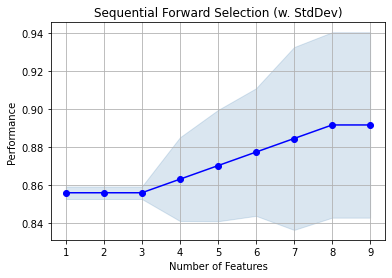

In [341]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


fig1 = plot_sfs(metric_dict, kind='std_dev')

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [342]:
list_gene = list(sfs1.k_feature_idx_)
list_gene

[0, 1, 2, 3, 4, 5, 9, 22, 24]

In [343]:
X_ga.values

array([[0.39323916, 0.04336657, 0.75039359, ..., 0.88460685, 0.05325409,
        0.05064402],
       [0.32662678, 0.07818974, 0.44010662, ..., 0.34567934, 0.15250022,
        0.11187275],
       [0.29135019, 0.38247523, 0.19543662, ..., 0.26499653, 0.31727114,
        0.13077366],
       ...,
       [0.53644919, 0.07959396, 0.32406712, ..., 0.29267211, 0.03934354,
        0.17655635],
       [0.27129233, 0.18338037, 0.85566323, ..., 0.73632494, 0.60655709,
        0.30423857],
       [0.30884024, 0.29450522, 0.29601126, ..., 0.47542223, 0.28587453,
        0.08915345]])

In [344]:
X_ga_sls = X_ga.values[:,list_gene]
y_ga_sls = y_ga
X_test_ga_sls = X_test_ga.values[:,list_gene]
y_test_ga_sls = y_test_ga

# K-fold cross validation

In [345]:
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import *
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import interp

num_runs = 10


In [346]:
from sklearn.metrics import *
def evaluate2(y_pred, y_test, y_probs):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    mcc = matthews_corrcoef(y_test, y_pred)
    auc = roc_auc_score(y_test, y_probs)
    for i in range(len(y_test)):
        if (y_pred[i]==1 and y_test[i]==1):
            tp = tp + 1
        elif (y_pred[i]==0 and y_test[i]==0):
            tn = tn + 1
        elif (y_pred[i]==1 and y_test[i]==0):
            fp = fp + 1
        else:
            fn = fn + 1
    sn = tp/(tp+fn)
    sp = tn/(tn+fp)
    fpr = fp/(tn+fp)
    acc = (tp+tn)/(tp+fp+tn+fn)
    M = {
        "sn":sn,
        "sp":sp,
        "acc":acc,
        "tp":tp,
        "tn":tn,
        "fp":fp,
        "fn":fn,
        "fpr":fpr
    }
    return  np.array([acc, sn, sp, mcc, auc, tp, fp, tn, fn])

In [508]:
def cross_validation(X, y, model, num_folds=10, random_state=0, n_runs=1, verbose=False, threshold=0.5):
    res = np.zeros(shape=(num_folds * n_runs, 9)) # 5 number of metrics
    base_fpr = np.linspace(0, 1, 101) #add a new parameter for 51
    tprs = []
    count = 0
    for cv_run in range(n_runs):
        skf = StratifiedKFold(n_splits=num_folds, random_state=random_state, shuffle=True)
        for train_index, test_index in skf.split(X,y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            train_filtered = X_train
            test_filtered = X_test
            
            model.fit(train_filtered, y_train)
            
            y_prob = model.predict_proba(test_filtered)[:,1]
            y_pred = model.predict(test_filtered)
            
            res[count, :] = evaluate2(y_prob, y_pred, y_test)

            fpr, tpr, _ = roc_curve(y_test, y_prob)
            tpr = interp(base_fpr, fpr, tpr)
            tpr[0] = 0.0
            tprs.append(tpr)
            count += 1

    tprs = np.array(tprs)
    mean_tprs = tprs.mean(axis=0)
    std = tprs.std(axis=0)

    rVal = {}
    rVal['metrics'] = np.mean(res, axis=0)
    rVal['metrics_std'] = np.std(res, axis=0)
    rVal['fpr'] = base_fpr
    rVal['tpr'] = mean_tprs
    return rVal

<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be remo

<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be remo

Logistic Regression: [ 0.89230769  0.          0.25        1.          0.33944681  0.85
  0.5         0.         11.9         1.5       ]


<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be remo

SGD: [ 0.84945055  0.09166667  0.5         0.90833333  0.36604474  0.88295455
  1.          1.1        10.8         1.        ]


<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be remo

<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be remo

SVM Linear: [ 0.88516484  0.          0.2         1.          0.27151019  0.84958333
  0.4         0.         11.9         1.6       ]


<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be remo

SVM RBF: [ 0.88516484  0.          0.2         1.          0.27151019  0.76083333
  0.4         0.         11.9         1.6       ]


<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be remo

<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be remo

<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-347-b2a284af0dd4>:23: DeprecationWarning: scipy.interp is deprecated and will be remo

RF 100: [ 0.89230769  0.01666667  0.35        0.98333333  0.40185408  0.74166667
  0.7         0.2        11.7         1.3       ]


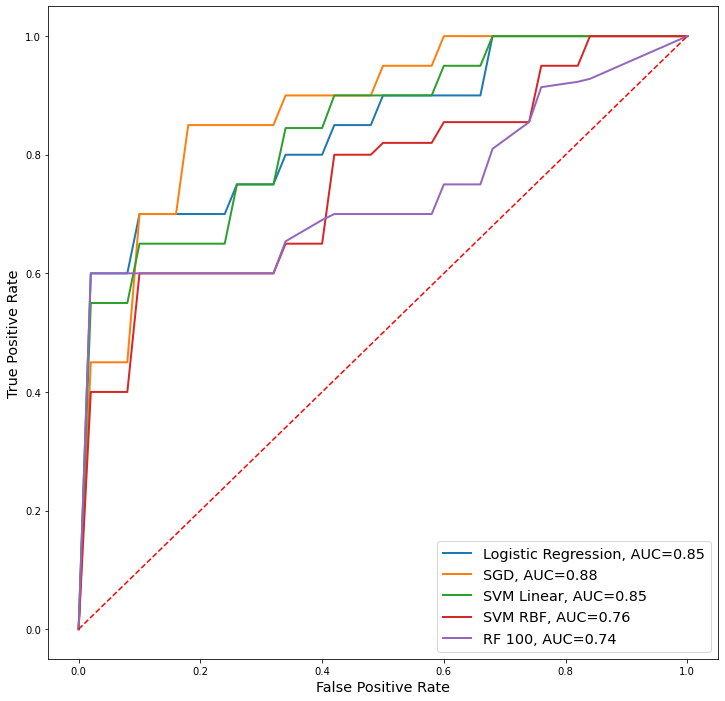

In [348]:
plt.figure(figsize=(12, 12))
plt.xlabel('False Positive Rate', fontsize='x-large')
plt.ylabel('True Positive Rate', fontsize='x-large')
models = [
    {
        'label': 'Logistic Regression',
        'model': LogisticRegression(penalty="l2", random_state=0),
    },
    {
        'label': 'SGD',
        'model': SGDClassifier(loss="log", penalty="l2", random_state=0),
    },
    {
        'label' : 'SVM Linear',
        'model': SVC(kernel='linear',probability=True),
    },
    {
        'label' : 'SVM RBF',
        'model': SVC(kernel='rbf',probability=True),
    },
    {
        'label' : 'RF 100',
        'model': RandomForestClassifier(n_estimators=100, random_state=0),
    },
]
for m in models:
    model = m['model']
    num_runs = 10
    res = cross_validation(X_ga_sls, y_ga_sls, model, num_folds=10, n_runs=num_runs)
    print('{0}: {1}'.format(m['label'], res['metrics']))
    plt.plot(res['fpr'], res['tpr'], label=m['label']+', AUC='+str(round(res['metrics'][5],2)), linewidth=2)

leg = plt.legend(loc='best', fontsize='x-large')
plt.plot([0, 1], [0, 1],'r--')
plt.show()

Logistic Regression: 
Evaluate score: {'sn': 0.125, 'sp': 1.0, 'acc': 0.8833333333333333, 'tp': 1, 'tn': 52, 'fp': 0, 'fn': 7, 'fpr': 0.0}
SGD: 
Evaluate score: {'sn': 0.875, 'sp': 0.8461538461538461, 'acc': 0.85, 'tp': 7, 'tn': 44, 'fp': 8, 'fn': 1, 'fpr': 0.15384615384615385}
SVM Linear: 
Evaluate score: {'sn': 0.125, 'sp': 1.0, 'acc': 0.8833333333333333, 'tp': 1, 'tn': 52, 'fp': 0, 'fn': 7, 'fpr': 0.0}
SVM RBF: 
Evaluate score: {'sn': 0.125, 'sp': 1.0, 'acc': 0.8833333333333333, 'tp': 1, 'tn': 52, 'fp': 0, 'fn': 7, 'fpr': 0.0}
KNN-15 nei: 
Evaluate score: {'sn': 0.0, 'sp': 1.0, 'acc': 0.8666666666666667, 'tp': 0, 'tn': 52, 'fp': 0, 'fn': 8, 'fpr': 0.0}
RF 100: 
Evaluate score: {'sn': 0.125, 'sp': 1.0, 'acc': 0.8833333333333333, 'tp': 1, 'tn': 52, 'fp': 0, 'fn': 7, 'fpr': 0.0}


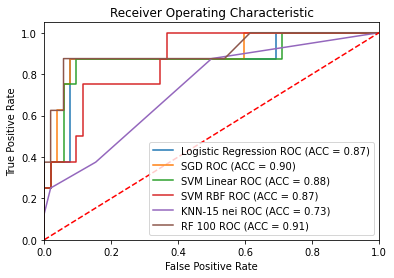

In [349]:
from xgboost.sklearn import XGBClassifier

models = [
    {
        'label': 'Logistic Regression',
        'model': LogisticRegression(penalty="l2", random_state=0),
    },
    {
        'label': 'SGD',
        'model': SGDClassifier(loss="log", penalty="l2", random_state=0),
    },
    {
        'label' : 'SVM Linear',
        'model': SVC(kernel='linear',probability=True),
    },
    {
        'label' : 'SVM RBF',
        'model': SVC(kernel='rbf',probability=True),
    },
    {
        'label' : 'KNN-15 nei',
        'model': KNeighborsClassifier(n_neighbors=15, p=2, n_jobs=-1),
    },
    {
        'label' : 'RF 100',
        'model': RandomForestClassifier(n_estimators=100, random_state=0),
    },
]

plt.figure(0).clf()

for m in models:
    model = m['model'] # select the model
    model.fit(X_ga_sls, y_ga_sls) # train the model
    y_pred=model.predict(X_test_ga_sls) # predict the test data
# Compute False postive rate, and True positive rate
    y_probs = model.predict_proba(X_test_ga_sls)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test_ga_sls, y_probs, pos_label=model.classes_[1])
# Calculate Area under the curve to display on the plot
    auc = metrics.auc(fpr,tpr)
    score = evaluate(y_pred, y_test_ga_sls)
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (ACC = %0.2f)' % (m['label'], auc))
    print("%s: \nEvaluate score:" % (m['label']), score)

    # # Custom settings for the plot 

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [350]:
fpr

array([0.        , 0.        , 0.        , 0.01923077, 0.01923077,
       0.05769231, 0.05769231, 0.09615385, 0.11538462, 0.15384615,
       0.19230769, 0.26923077, 0.36538462, 0.48076923, 0.51923077,
       0.53846154, 0.61538462, 0.80769231, 0.92307692, 1.        ])

In [351]:
thresholds

array([1.87, 0.87, 0.38, 0.37, 0.29, 0.24, 0.22, 0.2 , 0.18, 0.16, 0.14,
       0.11, 0.1 , 0.07, 0.06, 0.05, 0.04, 0.02, 0.01, 0.  ])

# Plot roc curve

In [352]:
def calculate_metric(y_test, y_prob, threshold):
    pred = np.zeros(60)
    for ind,value in enumerate(y_prob):
        if value < threshold:
            pred[ind] = 0
        else:
            pred[ind] = 1
    scores = evaluate(pred, y_test)
    return scores

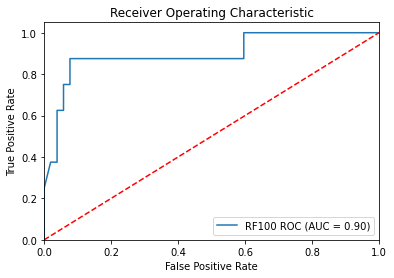

In [353]:
# model = LogisticRegression(penalty="l2", random_state=0)
model = SGDClassifier(loss="log", penalty="l2", random_state=0)
model.fit(X_ga_sls, y_ga_sls) # train the model
y_pred=model.predict(X_test_ga_sls) # predict the test data
# Compute False postive rate, and True positive rate
y_probs = model.predict_proba(X_test_ga_sls)[:,1]
threshold = np.linspace(0,5,100000)
fpr = []
tpr = []
for thresh in threshold:
    metric = calculate_metric(y_test_ga_sls, y_probs, thresh)
    tpr.append(metric["sn"])
    fpr.append(metric["fpr"])
# fpr, tpr, thresholds = metrics.roc_curve(y_test_ga_sls, y_probs)
# Calculate Area under the curve to display on the plot
auc = metrics.auc(fpr,tpr)
# score = evaluate(y_pred, y_test_ga_sls)
plt.plot(fpr, tpr, label='%s ROC (AUC = %0.2f)' % ('RF100', auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [354]:
auc

0.8978365384615384

In [355]:
y_probs

array([8.30332905e-05, 7.40633574e-03, 5.47748679e-02, 9.99244990e-01,
       9.33239920e-02, 7.93386334e-04, 9.60284191e-01, 7.43358469e-01,
       1.08752355e-01, 2.89175856e-03, 1.80822987e-04, 1.66933557e-01,
       1.12925978e-03, 3.44230424e-02, 3.33409575e-01, 9.99692285e-01,
       7.24344453e-05, 1.04212953e-02, 1.06576463e-01, 2.07230274e-04,
       3.72589566e-08, 9.99672895e-01, 4.35841108e-04, 9.83237259e-05,
       8.05618157e-01, 6.18149672e-04, 2.60421524e-04, 9.99999997e-01,
       5.40027712e-05, 4.00338838e-03, 8.35715331e-01, 4.79214466e-01,
       1.48426180e-01, 3.72128400e-02, 6.84082999e-02, 1.93342171e-01,
       8.48595490e-01, 4.96383969e-06, 3.66055810e-04, 9.99818507e-01,
       4.03094164e-03, 7.22096733e-01, 9.91042577e-01, 5.58643247e-06,
       9.81146099e-01, 1.33569549e-05, 1.20346930e-01, 1.96371518e-09,
       9.96762450e-01, 3.09341305e-02, 1.85147693e-05, 3.77328623e-02,
       1.30433325e-02, 4.47045016e-04, 1.80961738e-03, 9.87980187e-01,
      

# SFS 

In [360]:
X_ga = (pd.DataFrame(X_train))[a]
y_ga = y_train
X_test_ga = (pd.DataFrame(X_test))[a]
y_test_ga = y_test

In [357]:
one_arr = np.ones(109)
one_arr.shape

(109,)

In [358]:
X_train2[:,1]

array([0.73291892, 0.83048049, 0.1462924 , 0.35075994, 0.11340694,
       0.09819921, 0.20811015, 0.07959396, 0.10110858, 0.26604955,
       0.19642142, 0.28851699, 0.18035301, 0.17842751, 0.16453096,
       0.45912701, 0.44954651, 0.1620261 , 0.58549041, 0.64985487,
       0.26408232, 0.14774008, 0.15059384, 0.20134397, 0.08243027,
       0.27673366, 0.24764087, 0.6987607 , 0.5887464 , 0.63429293,
       0.14791561, 0.30357404, 0.71729024, 0.48401279, 0.43133227,
       0.69513327, 0.18614584, 0.95803688, 0.27081187, 0.83677987,
       0.15762545, 0.14451793, 0.06730104, 0.29450522, 0.12687091,
       0.34752371, 0.13331742, 0.93965909, 0.5714036 , 0.14413522,
       0.10206294, 0.10611655, 0.05871454, 0.07967699, 0.12390619,
       0.12754519, 1.        , 0.11321803, 0.05818925, 0.09156708,
       0.18247713, 0.53302184, 0.29292878, 0.07270413, 0.10876503,
       0.0575712 , 0.08510209, 0.0853921 , 0.16431771, 0.05299229,
       0.07853357, 0.02652959, 0.07980607, 0.260787  , 0.26064

In [386]:
# SFS score
# Set random seed

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_ga, y_ga, test_size = 0.3, random_state=114,
                                                   shuffle=True, stratify=y_ga)

model = SVC(kernel='rbf',probability=True)
total_score = []
# model = LogisticRegression(penalty="l2", random_state=0)
for i in range(25):
#     c = pd.DataFrame(X_train2[:,i])
#     d = pd.DataFrame(X_test2[:,i])
    c = pd.DataFrame((X_train2.values)[:,i])
    d = pd.DataFrame((X_test2.values)[:,i])
    model.fit(c, y_train2)
    y_pred2 = model.predict(d)
    metric = evaluate(y_pred2, y_test2)
    total_score.append(metric["acc"])

In [387]:
(X_train2.values).shape

(97, 25)

In [388]:
max_ind = np.argmax(total_score)
max_ind

3

In [394]:
total_score

[0.8571428571428571,
 0.7380952380952381,
 0.8571428571428571,
 0.8809523809523809,
 0.7380952380952381,
 0.8095238095238095,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571,
 0.8809523809523809,
 0.8571428571428571,
 0.8809523809523809,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571,
 0.7857142857142857,
 0.8571428571428571,
 0.8809523809523809]

In [395]:
total_score[max_ind]

0.8809523809523809

In [402]:
gene = []
for i in sg:
    gene.append(i)

In [403]:
gene

['SLC39A8',
 'RHAG',
 'DDIT4',
 'CCL3',
 'MAFF',
 'ENPP2',
 'SLCO4A1',
 'CCR2',
 'RGL1',
 'EMP1',
 'NME1',
 'TFRC',
 'CTSL1',
 'EBI3',
 'MT1G',
 'BTG3',
 'HSPA6',
 'RCBTB2',
 'NUAK2',
 'TNFAIP3',
 'NDUFS5',
 'RPL10',
 'PCNT',
 'SDC4',
 'WBP5']

In [404]:
gene_score = []
gene_score_ind = []
for i in range(25):
    max_ind = np.argmax(total_score)
    gene_score.append(gene[max_ind])
    gene_score_ind.append(max_ind)
    total_score[max_ind] = 0

In [472]:
gene_score

['CCL3',
 'EMP1',
 'TFRC',
 'WBP5',
 'SLC39A8',
 'DDIT4',
 'SLCO4A1',
 'CCR2',
 'RGL1',
 'NME1',
 'CTSL1',
 'EBI3',
 'MT1G',
 'BTG3',
 'HSPA6',
 'RCBTB2',
 'NUAK2',
 'TNFAIP3',
 'NDUFS5',
 'RPL10',
 'SDC4',
 'ENPP2',
 'PCNT',
 'RHAG',
 'MAFF']

In [406]:
gene_score_ind

[3,
 9,
 11,
 24,
 0,
 2,
 6,
 7,
 8,
 10,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 23,
 5,
 22,
 1,
 4]

In [408]:
a = gene_score_ind
total_comb = [None]*25
for i in range(25):
    arr = []
    for j in range(0, i + 1):
        arr.append(a[j])
    total_comb[i] = arr
    


In [409]:
for val in total_comb:
    print(val)

[3]
[3, 9]
[3, 9, 11]
[3, 9, 11, 24]
[3, 9, 11, 24, 0]
[3, 9, 11, 24, 0, 2]
[3, 9, 11, 24, 0, 2, 6]
[3, 9, 11, 24, 0, 2, 6, 7]
[3, 9, 11, 24, 0, 2, 6, 7, 8]
[3, 9, 11, 24, 0, 2, 6, 7, 8, 10]
[3, 9, 11, 24, 0, 2, 6, 7, 8, 10, 12]
[3, 9, 11, 24, 0, 2, 6, 7, 8, 10, 12, 13]
[3, 9, 11, 24, 0, 2, 6, 7, 8, 10, 12, 13, 14]
[3, 9, 11, 24, 0, 2, 6, 7, 8, 10, 12, 13, 14, 15]
[3, 9, 11, 24, 0, 2, 6, 7, 8, 10, 12, 13, 14, 15, 16]
[3, 9, 11, 24, 0, 2, 6, 7, 8, 10, 12, 13, 14, 15, 16, 17]
[3, 9, 11, 24, 0, 2, 6, 7, 8, 10, 12, 13, 14, 15, 16, 17, 18]
[3, 9, 11, 24, 0, 2, 6, 7, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19]
[3, 9, 11, 24, 0, 2, 6, 7, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[3, 9, 11, 24, 0, 2, 6, 7, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
[3, 9, 11, 24, 0, 2, 6, 7, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23]
[3, 9, 11, 24, 0, 2, 6, 7, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 5]
[3, 9, 11, 24, 0, 2, 6, 7, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 5, 22]
[3, 9

In [412]:
# get combination score
combination_value = []
# model2 = SVC(kernel='rbf',probability=True)
model2 = LogisticRegression(penalty="l2", random_state=0)
for val in total_comb:
    c = pd.DataFrame((X_train2.values)[:,val])
    d = pd.DataFrame((X_test2.values)[:,val])
    model2.fit(c, y_train2)
    y_pred2 = model2.predict(d)
    metric = evaluate(y_pred2, y_test2)
    combination_value.append({
        "com":val,
        "value":metric["acc"]
    })

In [413]:
len(combination_value)

25

In [414]:
combination_value

[{'com': [3], 'value': 0.8571428571428571},
 {'com': [3, 9], 'value': 0.8571428571428571},
 {'com': [3, 9, 11], 'value': 0.8571428571428571},
 {'com': [3, 9, 11, 24], 'value': 0.8809523809523809},
 {'com': [3, 9, 11, 24, 0], 'value': 0.8809523809523809},
 {'com': [3, 9, 11, 24, 0, 2], 'value': 0.8809523809523809},
 {'com': [3, 9, 11, 24, 0, 2, 6], 'value': 0.8809523809523809},
 {'com': [3, 9, 11, 24, 0, 2, 6, 7], 'value': 0.9047619047619048},
 {'com': [3, 9, 11, 24, 0, 2, 6, 7, 8], 'value': 0.9047619047619048},
 {'com': [3, 9, 11, 24, 0, 2, 6, 7, 8, 10], 'value': 0.9047619047619048},
 {'com': [3, 9, 11, 24, 0, 2, 6, 7, 8, 10, 12], 'value': 0.9285714285714286},
 {'com': [3, 9, 11, 24, 0, 2, 6, 7, 8, 10, 12, 13],
  'value': 0.9047619047619048},
 {'com': [3, 9, 11, 24, 0, 2, 6, 7, 8, 10, 12, 13, 14],
  'value': 0.9285714285714286},
 {'com': [3, 9, 11, 24, 0, 2, 6, 7, 8, 10, 12, 13, 14, 15],
  'value': 0.9285714285714286},
 {'com': [3, 9, 11, 24, 0, 2, 6, 7, 8, 10, 12, 13, 14, 15, 16],
  '

In [475]:
val = (combination_value[10])['com']
gene_selected = []
for i in range(11):
    gene_selected.append(gene_score[val[i]])

In [476]:
gene_selected

['WBP5',
 'NME1',
 'EBI3',
 'MAFF',
 'CCL3',
 'TFRC',
 'SLCO4A1',
 'CCR2',
 'RGL1',
 'CTSL1',
 'MT1G']

In [481]:
final_data = degs_gene_data[gene_selected]
final_data = final_data.values
y_final = degs_gene_data.iloc[:,108].values

In [505]:
# Normalize data
for i in range(11):
    final_data[:,i] = nml(final_data[:,i])

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(final_data, y_final, test_size = 0.3, random_state=134,
                                                   shuffle=True, stratify=y_final)

<BarContainer object of 139 artists>

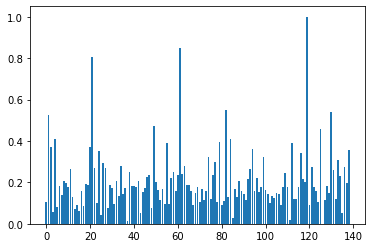

In [506]:
plt.bar(list(range(139)),X_train_final[0:139,0])

<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be remo

<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be remo

Logistic Regression: [ 0.88707335  0.          0.18518519  1.          0.27281109  0.80671296
  0.44444444  0.         15.22222222  2.        ]


<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be remo

<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be remo

SVM Linear: [ 0.88090051  0.          0.14814815  1.          0.21255263  0.81095679
  0.33333333  0.         15.22222222  2.11111111]


<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be remo

<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be remo

SVM RBF: [ 0.88090051  0.          0.14814815  1.          0.21255263  0.80859568
  0.33333333  0.         15.22222222  2.11111111]


<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be remo

<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be remo

RF 100: [ 0.88671024  0.02962963  0.37037037  0.97037037  0.3846282   0.79498457
  0.88888889  0.44444444 14.77777778  1.55555556]


<ipython-input-508-6609967f64ab>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)


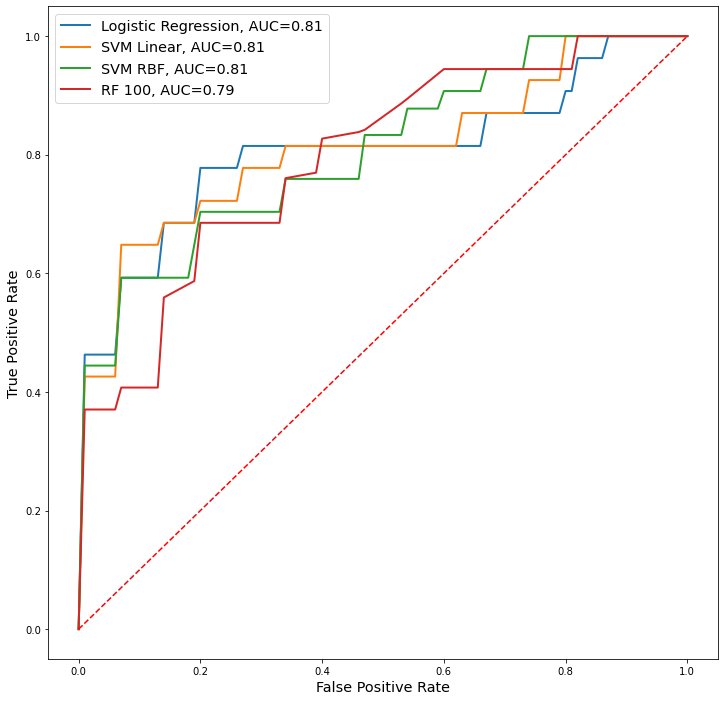

In [524]:
plt.figure(figsize=(12, 12))
plt.xlabel('False Positive Rate', fontsize='x-large')
plt.ylabel('True Positive Rate', fontsize='x-large')
models = [
    {
        'label': 'Logistic Regression',
        'model': LogisticRegression(penalty="l2", random_state=0),
    },
    {
        'label' : 'SVM Linear',
        'model': SVC(kernel='linear',probability=True),
    },
    {
        'label' : 'SVM RBF',
        'model': SVC(kernel='rbf',probability=True),
    },
    {
        'label' : 'RF 100',
        'model': RandomForestClassifier(n_estimators=100, random_state=0),
    },
]
for m in models:
    model = m['model']
    num_runs = 10
    res = cross_validation(X_train_final, y_train_final, model, num_folds=9, n_runs=num_runs)
    print('{0}: {1}'.format(m['label'], res['metrics']))
    plt.plot(res['fpr'], res['tpr'], label=m['label']+', AUC='+str(round(res['metrics'][5],2)), linewidth=2)

leg = plt.legend(loc='best', fontsize='x-large')
plt.plot([0, 1], [0, 1],'r--')
plt.show()